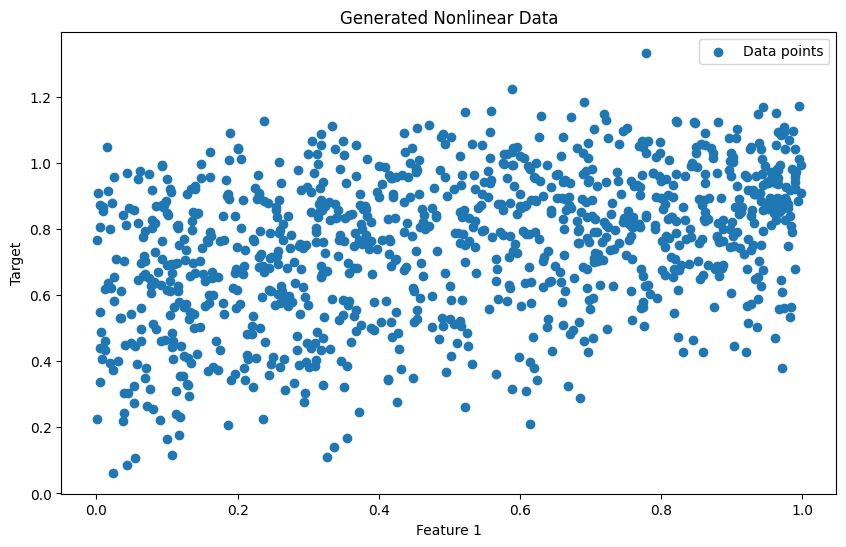

In [ ]:
def generate_nonlinear_data(n_samples, n_features, noise=0.1):
    np.random.seed(0)
    X = np.random.rand(n_samples, n_features)
    true_beta = np.random.rand(n_features)
    Y = np.sin(X.dot(true_beta)) + noise * np.random.randn(n_samples)
    return X, Y, true_beta

# Generate data
n_samples = 1000
n_features = 3
X, Y, true_beta = generate_nonlinear_data(n_samples, n_features)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, label='Data points')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Generated Nonlinear Data')
plt.legend()
plt.show()


Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2034				0.5113			1.3072
20		1.3012				1.3073			1.3073
30		1.1360				1.1449			1.1449
40		1.1759				1.1759			1.1759
50		1.1635				1.1468			1.1637
60		1.1260				1.1297			1.1189
70		1.1246				1.1335			1.1335
80		1.1264				1.1326			1.1326
90		1.1260				1.1284			1.1324
100		1.1250				1.1369			1.1175


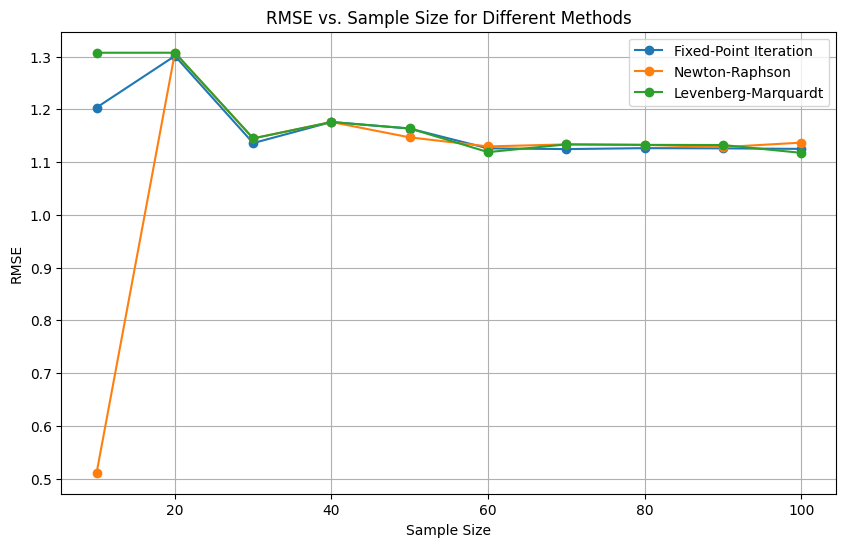

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
y_data = true_params[0] * np.sin(true_params[1] * x_data) + true_params[2] + np.random.normal(0, 0.5, len(x_data))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Generate data for different sample sizes
sample_data = generate_sample_sizes(x_data, y_data, sample_sizes)

# Placeholder for RMSE values
rmse_fixed_point = []
rmse_newton_raphson = []
rmse_levenberg_marquardt = []

# Initial parameter guess
initial_params = np.array([1.0, -1.0, 0.5])

# Fixed-Point Iteration
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    for i in range(100):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        params += 0.01 * np.array([np.sum(error * np.sin(params[1] * x_sample)),
                                   np.sum(error * params[0] * x_sample * np.cos(params[1] * x_sample)),
                                   np.sum(error)])
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_fixed_point.append(rmse(y_data, y_pred_full))

# Newton-Raphson
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    for i in range(10):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        J = np.vstack((np.sin(params[1] * x_sample),
                       params[0] * x_sample * np.cos(params[1] * x_sample),
                       np.ones_like(x_sample))).T
        H = J.T @ J
        params += np.linalg.inv(H) @ J.T @ error
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_newton_raphson.append(rmse(y_data, y_pred_full))

# Levenberg-Marquardt
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    lambda_param = 0.01
    for i in range(10):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        J = np.vstack((np.sin(params[1] * x_sample),
                       params[0] * x_sample * np.cos(params[1] * x_sample),
                       np.ones_like(x_sample))).T
        H = J.T @ J
        params += np.linalg.inv(H + lambda_param * np.eye(3)) @ J.T @ error
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_levenberg_marquardt.append(rmse(y_data, y_pred_full))

# Print RMSE values
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_fixed_point, rmse_newton_raphson, rmse_levenberg_marquardt):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

# Plotting RMSE vs. Sample Size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_fixed_point, label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_newton_raphson, label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_levenberg_marquardt, label='Levenberg-Marquardt', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Sample Size for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


Lambda Values: [0.01, 0.1, 1, 10, 100]
RMSE: [1.0154835462701284, 1.0154835462702925, 1.0154835462706822, 1.015483546270663, 1.0154835977112187]
Iterations: [6, 8, 24, 172, 1000]


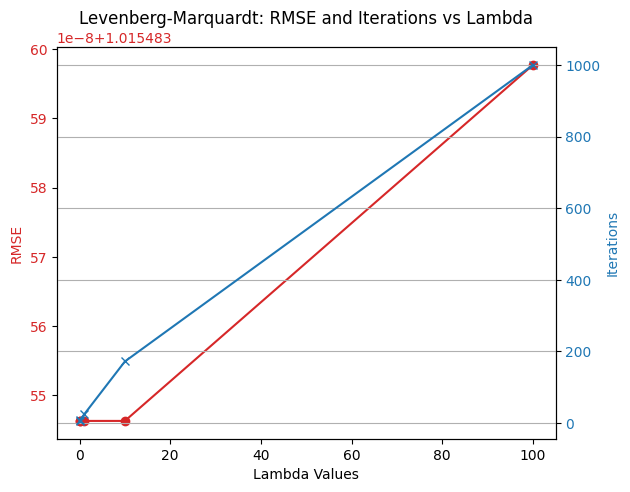

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def levenberg_marquardt(X, Y, max_iterations=1000, tolerance=1e-6, lambda_val=0.01):
    beta = np.zeros(X.shape[1])
    for i in range(max_iterations):
        Y_pred = X.dot(beta)
        error = Y_pred - Y
        gradient = np.mean(X * error[:, np.newaxis], axis=0)
        hessian = np.mean(X**2, axis=0)
        if np.abs(gradient).max() < tolerance:
            break
        beta = beta - gradient / (hessian + lambda_val)
    return beta, i + 1  # return beta and number of iterations

def collect_and_plot_lambda(X, Y, lambda_values):
    rmse = []
    iterations = []

    for lambda_val in lambda_values:
        beta_lm, iter_count = levenberg_marquardt(X, Y, lambda_val=lambda_val)
        Y_pred = X.dot(beta_lm)
        rmse_val = np.sqrt(np.mean((Y_pred - Y)**2))
        rmse.append(rmse_val)
        iterations.append(iter_count)

    # Print results
    print(f"Lambda Values: {lambda_values}")
    print(f"RMSE: {rmse}")
    print(f"Iterations: {iterations}")

    # Plotting RMSE and Iterations
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Lambda Values')
    ax1.set_ylabel('RMSE', color=color)
    ax1.plot(lambda_values, rmse, marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Iterations', color=color)
    ax2.plot(lambda_values, iterations, marker='x', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Levenberg-Marquardt: RMSE and Iterations vs Lambda')
    plt.grid(True)
    plt.show()

# Example usage with simulated data
np.random.seed(0)
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)
true_beta = np.array([2.5, -1.0, 0.5])
Y = X.dot(true_beta) + np.random.normal(0, 1, n_samples)

# Lambda values to test
lambda_values = [0.01, 0.1, 1, 10, 100]

# Collect and plot results
collect_and_plot_lambda(X, Y, lambda_values)


Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2034				0.5113			1.3072
20		1.3012				1.3073			1.3073
30		1.1360				1.1449			1.1449
40		1.1759				1.1759			1.1759
50		1.1635				1.1468			1.1637
60		1.1260				1.1297			1.1189
70		1.1246				1.1335			1.1335
80		1.1264				1.1326			1.1326
90		1.1260				1.1284			1.1324
100		1.1250				1.1369			1.1175


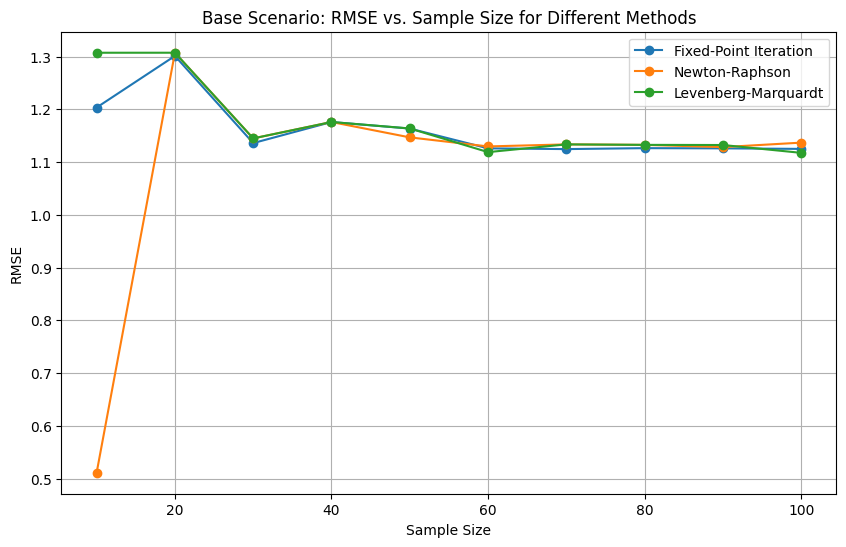


Population Characteristic: Different Amplitude
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.4042				1.4049			1.4049
20		1.1381				1.1743			1.1743
30		1.1372				1.1685			1.1403
40		1.1210				1.1322			1.1322
50		1.1321				1.1321			1.1321
60		1.1312				1.1486			1.1486
70		1.1268				1.1404			1.1362
80		1.1287				1.1273			1.1273
90		1.1256				1.1283			1.1283
100		1.1207				0.4888			0.4888


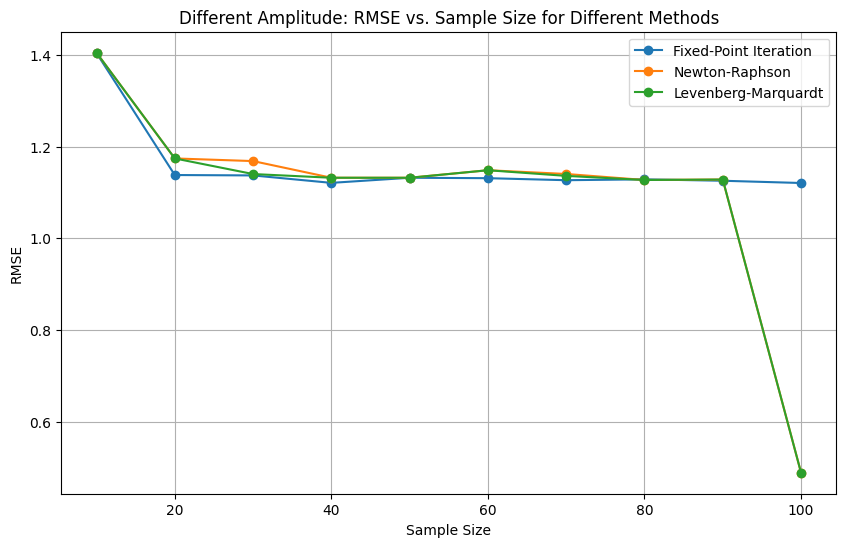


Population Characteristic: Different Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.5448				2.2503			2.2503
20		0.9817				0.9822			1.2080
30		1.1538				1.1514			1.1550
40		1.1629				1.1700			1.1274
50		1.1358				1.1769			1.1763
60		1.1509				1.7323			1.6287
70		1.2048				1.1595			1.1595
80		1.1312				1.6129			1.4799
90		1.1472				1.2521			1.0119
100		1.1497				1.1378			1.1452


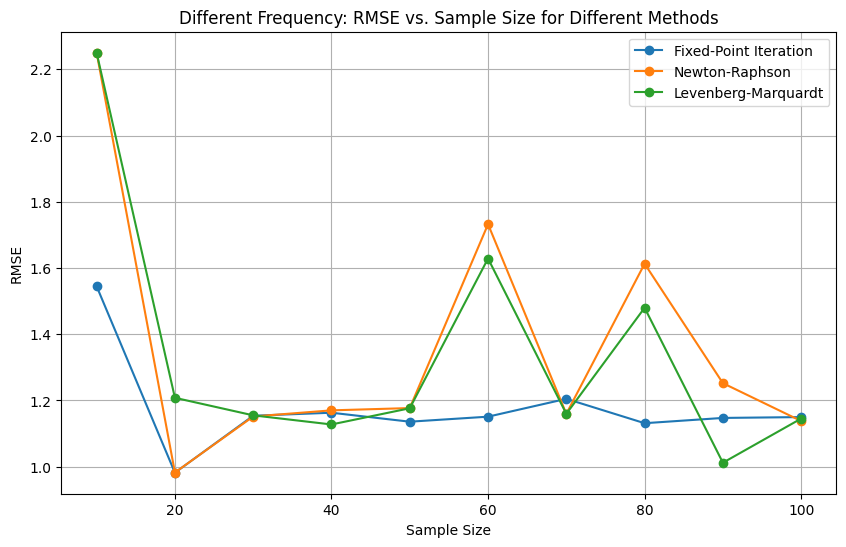


Population Characteristic: Different Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.3012				1.1752			1.1985
20		1.2524				1.3733			1.3733
30		1.3508				1.3508			1.3508
40		1.2911				1.2911			1.2911
50		1.2515				1.2578			1.2527
60		1.2410				1.3373			1.2310
70		1.1984				1.2036			1.2036
80		1.2309				1.2285			1.2981
90		1.2094				1.1981			1.1987
100		1.2272				1.2529			1.2327


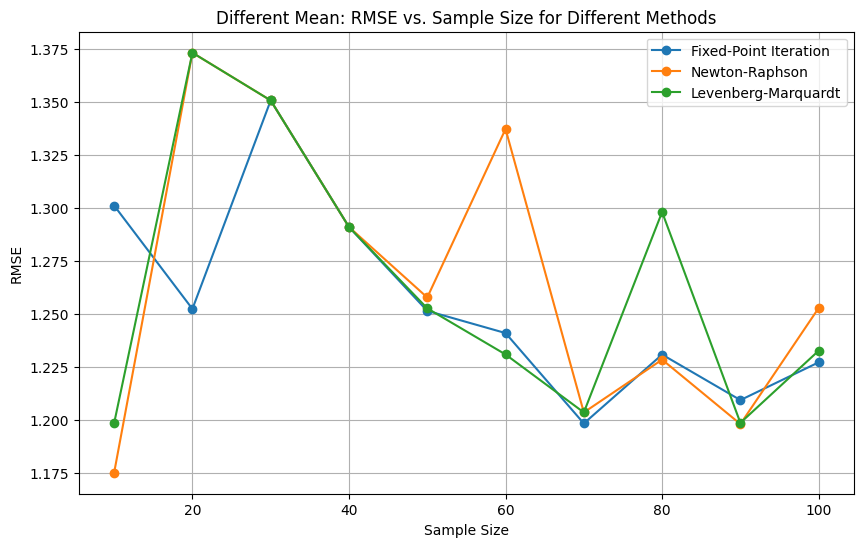

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with different population characteristics
def simulate_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Parameters for simulation
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
noise_std = 0.5

# Generate data for base scenario
y_data_base = simulate_data(x_data, true_params, noise_std)

# Different population characteristics
population_params = [
    np.array([1.2, -2.0, 1.0]),  # Different amplitude
    np.array([1.5, -1.5, 1.0]),  # Different frequency
    np.array([1.5, -2.0, 0.5])   # Different mean
]
population_labels = ['Different Amplitude', 'Different Frequency', 'Different Mean']

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Placeholder for RMSE values
rmse_methods = {
    'Fixed-Point Iteration': [],
    'Newton-Raphson': [],
    'Levenberg-Marquardt': []
}

# Initial parameter guess
initial_params = np.array([1.0, -1.0, 0.5])

# Function to evaluate methods with different data
def evaluate_methods(sample_data, initial_params):
    rmse_values = {method: [] for method in rmse_methods}

    for x_sample, y_sample in sample_data:
        # Fixed-Point Iteration
        params_fp = initial_params.copy()
        for i in range(100):
            y_pred_fp = params_fp[0] * np.sin(params_fp[1] * x_sample) + params_fp[2]
            error_fp = y_sample - y_pred_fp
            params_fp += 0.01 * np.array([
                np.sum(error_fp * np.sin(params_fp[1] * x_sample)),
                np.sum(error_fp * params_fp[0] * x_sample * np.cos(params_fp[1] * x_sample)),
                np.sum(error_fp)
            ])
        y_pred_full_fp = params_fp[0] * np.sin(params_fp[1] * x_data) + params_fp[2]
        rmse_values['Fixed-Point Iteration'].append(rmse(y_data_base, y_pred_full_fp))

        # Newton-Raphson
        params_nr = initial_params.copy()
        for i in range(10):
            y_pred_nr = params_nr[0] * np.sin(params_nr[1] * x_sample) + params_nr[2]
            error_nr = y_sample - y_pred_nr
            J_nr = np.vstack((
                np.sin(params_nr[1] * x_sample),
                params_nr[0] * x_sample * np.cos(params_nr[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_nr = J_nr.T @ J_nr
            params_nr += np.linalg.inv(H_nr) @ J_nr.T @ error_nr
        y_pred_full_nr = params_nr[0] * np.sin(params_nr[1] * x_data) + params_nr[2]
        rmse_values['Newton-Raphson'].append(rmse(y_data_base, y_pred_full_nr))

        # Levenberg-Marquardt
        params_lm = initial_params.copy()
        lambda_param = 0.01
        for i in range(10):
            y_pred_lm = params_lm[0] * np.sin(params_lm[1] * x_sample) + params_lm[2]
            error_lm = y_sample - y_pred_lm
            J_lm = np.vstack((
                np.sin(params_lm[1] * x_sample),
                params_lm[0] * x_sample * np.cos(params_lm[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_lm = J_lm.T @ J_lm
            params_lm += np.linalg.inv(H_lm + lambda_param * np.eye(3)) @ J_lm.T @ error_lm
        y_pred_full_lm = params_lm[0] * np.sin(params_lm[1] * x_data) + params_lm[2]
        rmse_values['Levenberg-Marquardt'].append(rmse(y_data_base, y_pred_full_lm))

    return rmse_values

# Evaluate methods for base scenario
rmse_methods_base = evaluate_methods(generate_sample_sizes(x_data, y_data_base, sample_sizes), initial_params)

# Evaluate methods for different population characteristics
rmse_methods_characteristics = []
for params in population_params:
    y_data_characteristic = simulate_data(x_data, params, noise_std)
    rmse_characteristic = evaluate_methods(generate_sample_sizes(x_data, y_data_characteristic, sample_sizes), initial_params)
    rmse_methods_characteristics.append(rmse_characteristic)

# Print and plot results for base scenario
print("Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques")
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], rmse_methods_base['Newton-Raphson'], rmse_methods_base['Levenberg-Marquardt']):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

# Plot RMSE vs. Sample Size for base scenario
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Newton-Raphson'], label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('Base Scenario: RMSE vs. Sample Size for Different Methods')
plt.legend()
plt.grid(True)
plt.show()

# Print and plot results for different population characteristics
for i, (params, label) in enumerate(zip(population_params, population_labels)):
    print(f"\nPopulation Characteristic: {label}")
    print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
    for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], rmse_methods_characteristics[i]['Newton-Raphson'], rmse_methods_characteristics[i]['Levenberg-Marquardt']):
        print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

    # Plot RMSE vs. Sample Size for different population characteristics
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Newton-Raphson'], label='Newton-Raphson', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
    plt.xlabel('Sample Size')
    plt.ylabel('RMSE')
    plt.title(f"{label}: RMSE vs. Sample Size for Different Methods")
    plt.legend()
    plt.grid(True)
    plt.show()


Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2034				0.5113			0.5358
20		1.3012				1.3073			1.3073
30		1.1360				1.1449			1.1449
40		1.1759				1.1759			1.1759
50		1.1635				1.1468			1.1617
60		1.1260				1.1297			1.1371
70		1.1246				1.1335			1.1335
80		1.1264				1.1326			1.1326
90		1.1260				1.1284			1.1307
100		1.1250				1.1369			1.1271


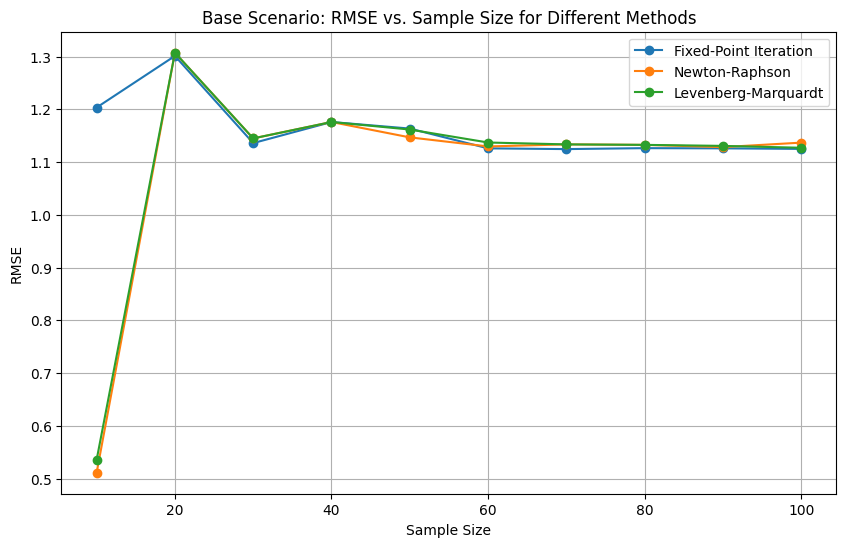


Population Characteristic: Base Scenario
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.4858				1.4876			1.4876
20		1.1160				1.2096			1.2096
30		1.1445				0.4629			1.1667
40		1.1235				1.1336			1.1336
50		1.1316				1.1316			1.1316
60		1.1365				1.1847			1.1216
70		1.1298				1.1281			1.1189
80		1.1271				1.1276			1.1275
90		1.1290				1.1285			1.1285
100		1.1319				0.4567			1.1100


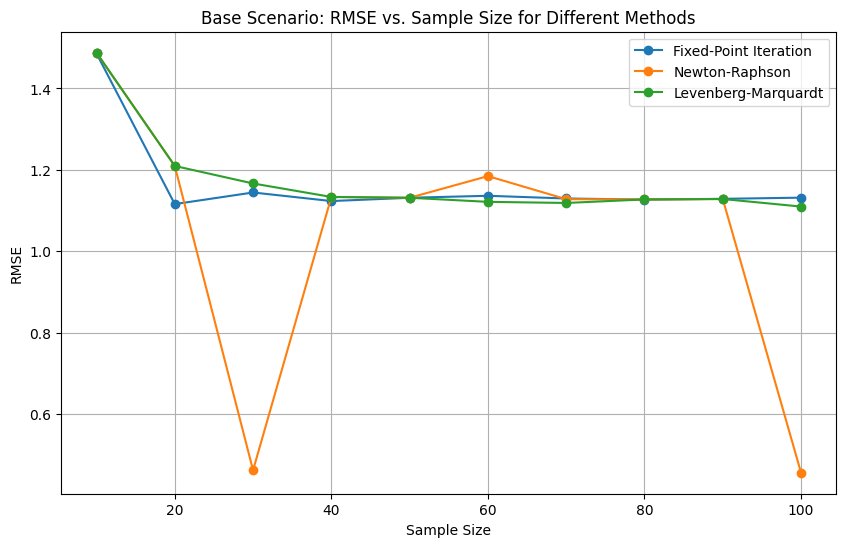


Population Characteristic: Higher Amplitude
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.3706				1.5859			1.5859
20		1.1843				1.1656			1.1679
30		1.2188				1.1501			1.1804
40		1.2096				1.2062			1.2062
50		1.1271				1.1573			1.1577
60		1.1374				1.1191			1.1410
70		1.1408				1.1451			1.1428
80		1.1392				1.1392			1.1392
90		1.1237				1.1250			1.1752
100		1.1238				1.1288			1.1279


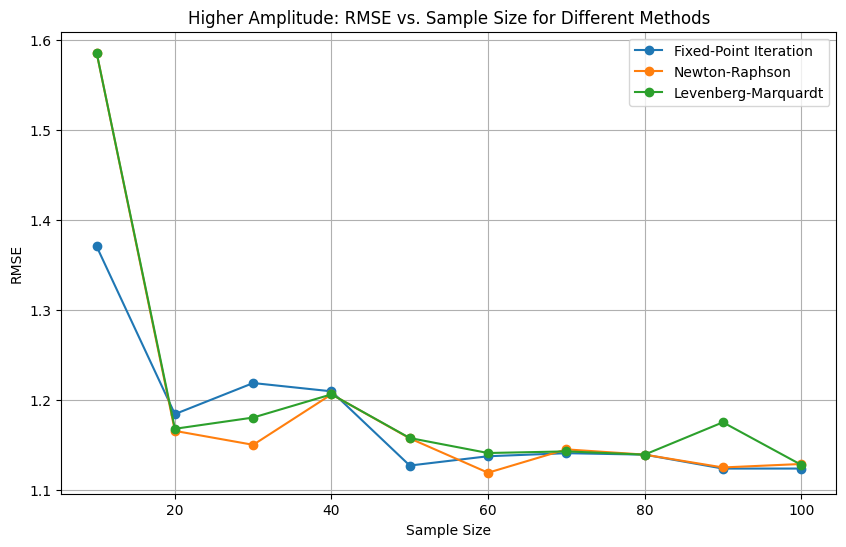


Population Characteristic: Higher Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2221				1.2197			1.2197
20		1.1323				1.1323			1.1323
30		1.1392				1.1389			1.1390
40		1.1627				1.1627			1.1627
50		1.1522				1.1738			1.1300
60		1.1560				1.1291			1.1185
70		1.1401				1.1496			1.1497
80		1.1333				1.1398			1.1312
90		1.1332				1.1357			1.1335
100		1.1421				1.1296			1.1295


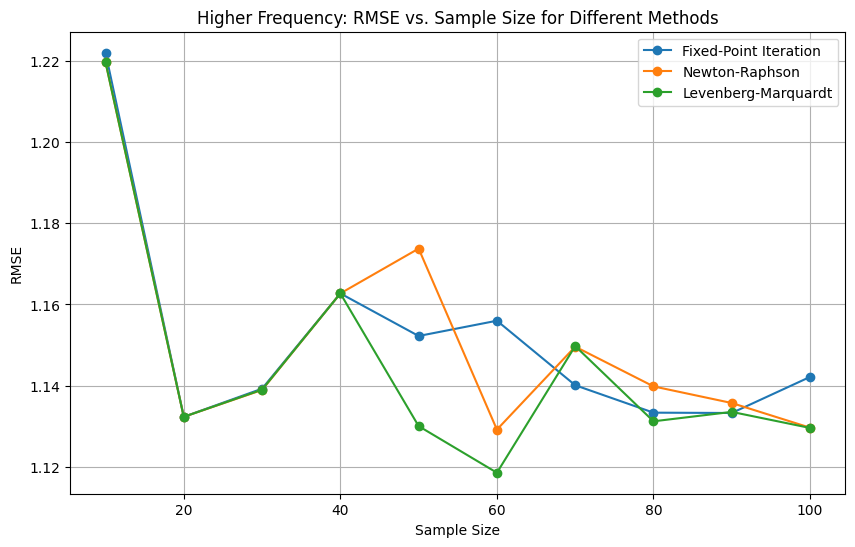


Population Characteristic: Lower Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.3211				1.4205			1.5282
20		1.1984				1.1979			1.1979
30		1.1358				1.1938			1.1938
40		1.1641				166.7125			1.1328
50		1.1294				1.1948			1.2440
60		1.1351				1.1490			1.1491
70		1.1331				1.1341			1.1341
80		1.1362				1.1314			1.1152
90		1.1342				1.1457			1.1335
100		1.1298				1.1219			1.1456


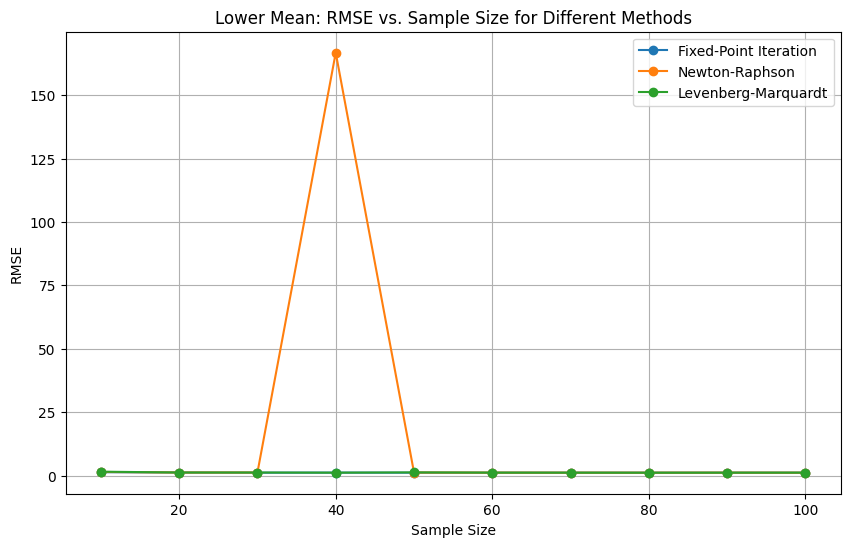


Population Characteristic: Higher Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.1815				1.3146			1.3143
20		1.2225				1.1364			1.1359
30		1.2883				1.2883			1.2883
40		1.1295				1.1564			1.1564
50		1.1455				1.1670			1.1670
60		1.1345				1.1386			1.1341
70		1.1333				1.1041			1.1173
80		1.1510				1.1441			1.1503
90		1.1489				0.4815			1.1441
100		1.1409				1.1369			1.1386


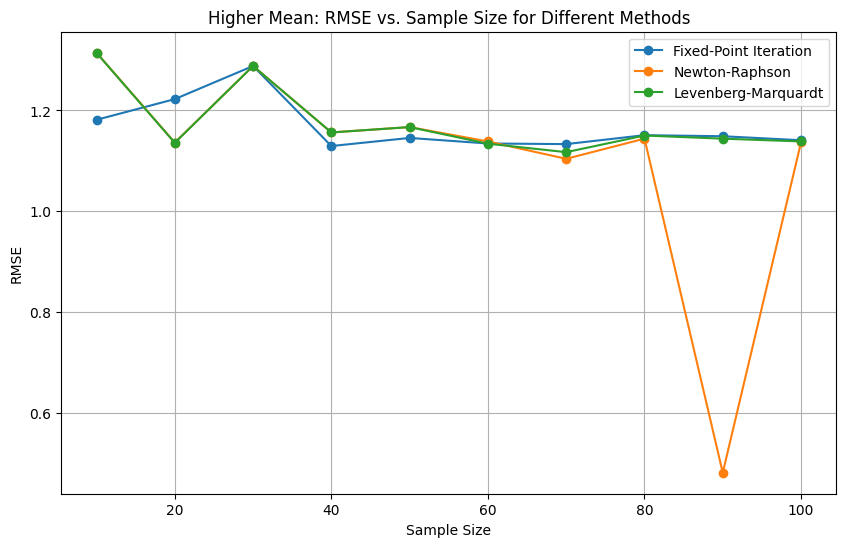


Population Characteristic: Shifted Phase (Different Trend)
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2322				1.2176			1.2302
20		1.1416				1.1439			1.1355
30		1.1249				1.1312			1.1326
40		1.1298				2.4563			1.1284
50		1.1317				1.1681			1.1681
60		1.1356				1.1367			1.1319
70		1.1319				1.1501			1.1309
80		1.1367				1.1488			1.1689
90		1.1456				1.1381			1.1394
100		1.1334				1.2281			1.1882


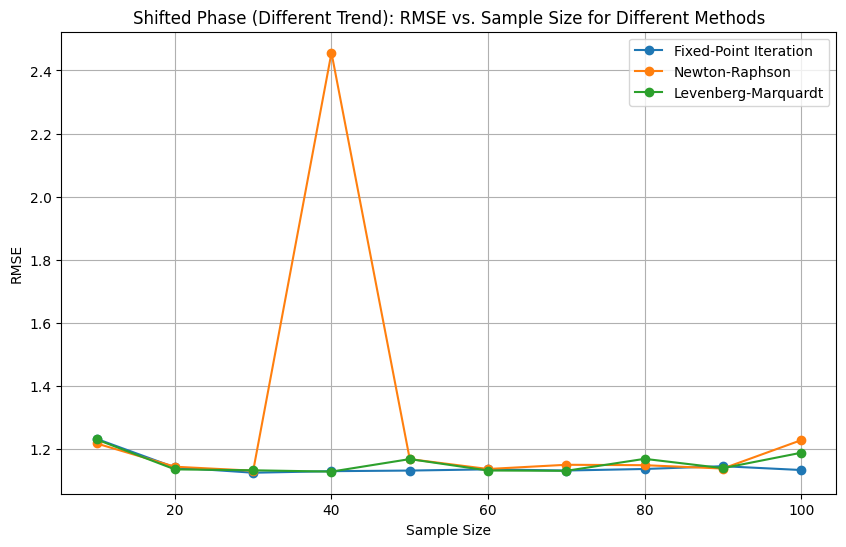


Population Characteristic: Lower Amplitude, Lower Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2455				1.2423			1.2432
20		1.1559				1.1816			1.1817
30		1.2099				1.2155			1.1807
40		1.1425				1.2255			1.1371
50		1.1278				1.1682			1.1472
60		1.1333				1.1548			1.1374
70		1.1465				1.1190			1.7397
80		1.1363				1.1282			1.1284
90		1.1366				1.1321			1.1319
100		1.1357				1.1295			1.1349


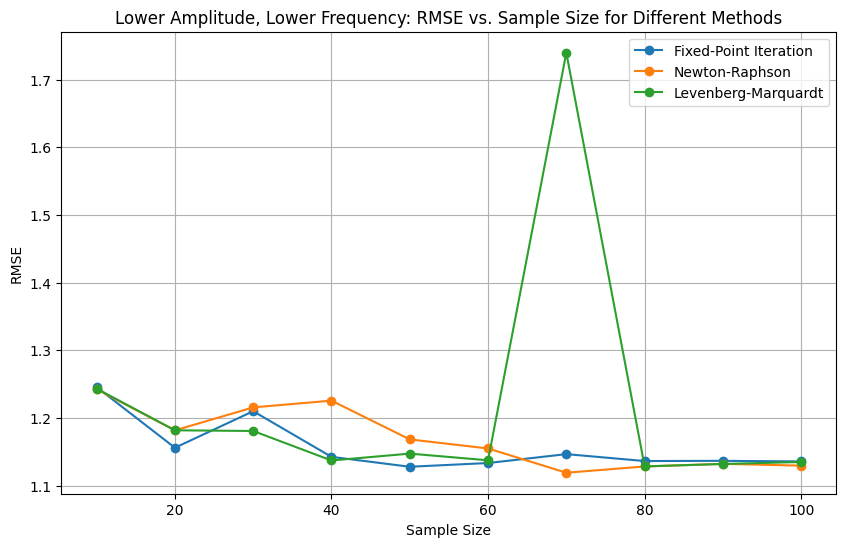


Population Characteristic: Higher Amplitude, Shifted Phase
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2549				1.2783			1.2208
20		1.2235				1.2110			2.2810
30		1.1560				1.1560			1.1560
40		1.1849				1.1846			1.1847
50		1.1395				1.1316			1.1300
60		1.1320				1.1622			1.1622
70		1.1273				1.1270			1.1397
80		1.1459				1.2073			1.1269
90		1.1274				1.1575			1.1250
100		1.1293				1.1382			1.1543


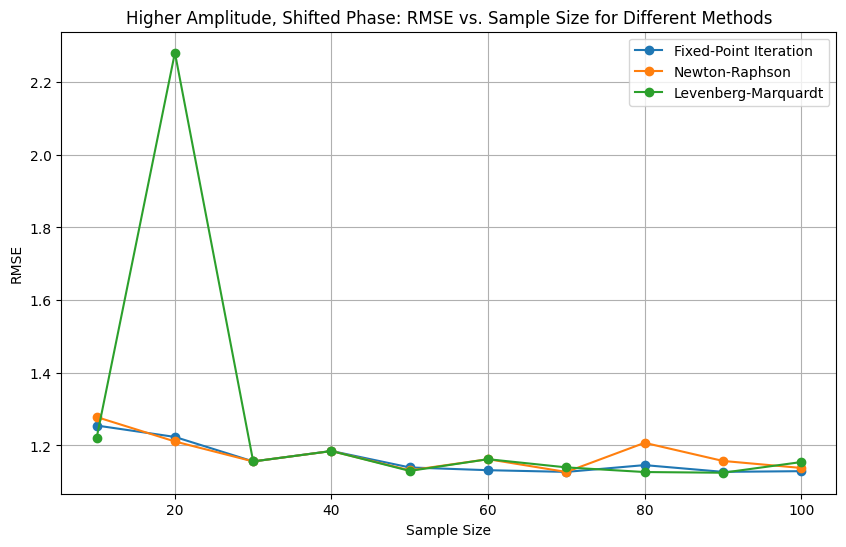

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with different population characteristics
def simulate_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Parameters for simulation
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
noise_std = 0.5

# Generate data for base scenario
y_data_base = simulate_data(x_data, true_params, noise_std)

# Different population characteristics
population_params = [
    np.array([1.5, -2.0, 1.0]),  # Base scenario (same as before)
    np.array([1.8, -2.0, 1.0]),  # Higher amplitude
    np.array([1.5, -1.8, 1.0]),  # Higher frequency
    np.array([1.5, -2.0, 0.8]),  # Lower mean
    np.array([1.5, -2.0, 1.2]),  # Higher mean
    np.array([1.5, -2.2, 1.0]),  # Shifted phase (different trend)
    np.array([1.3, -1.8, 1.0]),  # Lower amplitude, lower frequency
    np.array([1.8, -2.2, 1.2])   # Higher amplitude, shifted phase
]
population_labels = [
    'Base Scenario', 'Higher Amplitude', 'Higher Frequency',
    'Lower Mean', 'Higher Mean', 'Shifted Phase (Different Trend)',
    'Lower Amplitude, Lower Frequency', 'Higher Amplitude, Shifted Phase'
]

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Placeholder for RMSE values
rmse_methods = {
    'Fixed-Point Iteration': [],
    'Newton-Raphson': [],
    'Levenberg-Marquardt': []
}

# Initial parameter guess
initial_params = np.array([1.0, -1.0, 0.5])

# Function to evaluate methods with different data
def evaluate_methods(sample_data, initial_params):
    rmse_values = {method: [] for method in rmse_methods}

    for x_sample, y_sample in sample_data:
        # Fixed-Point Iteration
        params_fp = initial_params.copy()
        for i in range(100):
            y_pred_fp = params_fp[0] * np.sin(params_fp[1] * x_sample) + params_fp[2]
            error_fp = y_sample - y_pred_fp
            params_fp += 0.01 * np.array([
                np.sum(error_fp * np.sin(params_fp[1] * x_sample)),
                np.sum(error_fp * params_fp[0] * x_sample * np.cos(params_fp[1] * x_sample)),
                np.sum(error_fp)
            ])
        y_pred_full_fp = params_fp[0] * np.sin(params_fp[1] * x_data) + params_fp[2]
        rmse_values['Fixed-Point Iteration'].append(rmse(y_data_base, y_pred_full_fp))

        # Newton-Raphson
        params_nr = initial_params.copy()
        for i in range(10):
            y_pred_nr = params_nr[0] * np.sin(params_nr[1] * x_sample) + params_nr[2]
            error_nr = y_sample - y_pred_nr
            J_nr = np.vstack((
                np.sin(params_nr[1] * x_sample),
                params_nr[0] * x_sample * np.cos(params_nr[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_nr = J_nr.T @ J_nr
            params_nr += np.linalg.inv(H_nr) @ J_nr.T @ error_nr
        y_pred_full_nr = params_nr[0] * np.sin(params_nr[1] * x_data) + params_nr[2]
        rmse_values['Newton-Raphson'].append(rmse(y_data_base, y_pred_full_nr))

        # Levenberg-Marquardt
        params_lm = initial_params.copy()
        lambda_param = 0.1
        for i in range(10):
            y_pred_lm = params_lm[0] * np.sin(params_lm[1] * x_sample) + params_lm[2]
            error_lm = y_sample - y_pred_lm
            J_lm = np.vstack((
                np.sin(params_lm[1] * x_sample),
                params_lm[0] * x_sample * np.cos(params_lm[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_lm = J_lm.T @ J_lm
            params_lm += np.linalg.inv(H_lm + lambda_param * np.eye(3)) @ J_lm.T @ error_lm
        y_pred_full_lm = params_lm[0] * np.sin(params_lm[1] * x_data) + params_lm[2]
        rmse_values['Levenberg-Marquardt'].append(rmse(y_data_base, y_pred_full_lm))

    return rmse_values

# Evaluate methods for base scenario
rmse_methods_base = evaluate_methods(generate_sample_sizes(x_data, y_data_base, sample_sizes), initial_params)

# Evaluate methods for different population characteristics
rmse_methods_characteristics = []
for params in population_params:
    y_data_characteristic = simulate_data(x_data, params, noise_std)
    rmse_characteristic = evaluate_methods(generate_sample_sizes(x_data, y_data_characteristic, sample_sizes), initial_params)
    rmse_methods_characteristics.append(rmse_characteristic)

# Print and plot results for base scenario
print("Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques")
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], rmse_methods_base['Newton-Raphson'], rmse_methods_base['Levenberg-Marquardt']):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

# Plot RMSE vs. Sample Size for base scenario
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Newton-Raphson'], label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('Base Scenario: RMSE vs. Sample Size for Different Methods')
plt.legend()
plt.grid(True)
plt.show()

# Print and plot results for different population characteristics
for i, (params, label) in enumerate(zip(population_params, population_labels)):
    print(f"\nPopulation Characteristic: {label}")
    print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
    for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], rmse_methods_characteristics[i]['Newton-Raphson'], rmse_methods_characteristics[i]['Levenberg-Marquardt']):
        print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

    # Plot RMSE vs. Sample Size for different population characteristics
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Newton-Raphson'], label='Newton-Raphson', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
    plt.xlabel('Sample Size')
    plt.ylabel('RMSE')
    plt.title(f"{label}: RMSE vs. Sample Size for Different Methods")
    plt.legend()
    plt.grid(True)
    plt.show()


Objective 1: Evaluate Three Non-linear Iterative Estimation Techniques
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE (Improved)
10		1.2034				0.5113			0.5358
20		1.3012				1.3073			0.4576
30		1.1360				1.1449			0.4973
40		1.1759				1.1759			0.4629
50		1.1635				1.1468			0.4632
60		1.1260				1.1297			0.4539
70		1.1246				1.1335			0.4542
80		1.1264				1.1326			0.4516
90		1.1260				1.1284			0.4509
100		1.1250				1.1369			0.4508


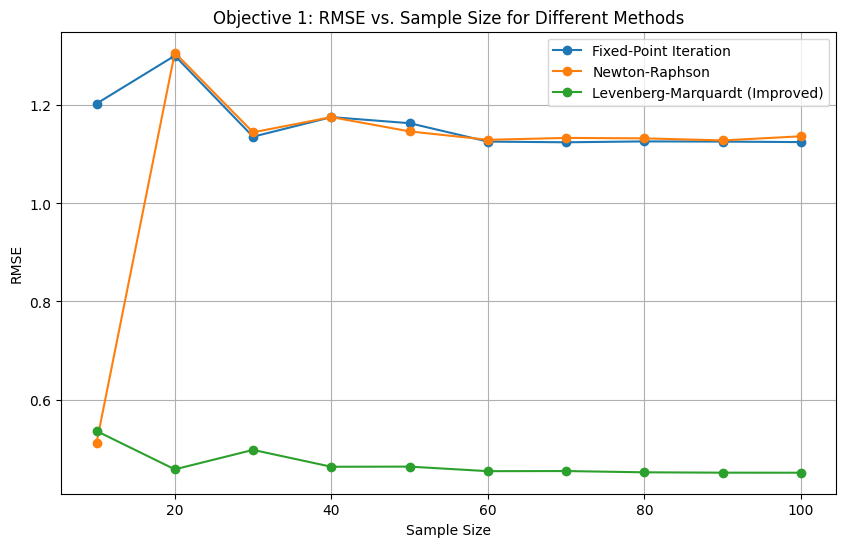

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
y_data = true_params[0] * np.sin(true_params[1] * x_data) + true_params[2] + np.random.normal(0, 0.5, len(x_data))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Generate data for different sample sizes
sample_data = generate_sample_sizes(x_data, y_data, sample_sizes)

# Placeholder for RMSE values
rmse_fixed_point = []
rmse_newton_raphson = []
rmse_levenberg_marquardt = []

# Initial parameter guess
initial_params = np.array([1.0, -1.0, 0.5])

# Fixed-Point Iteration
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    for i in range(100):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        params += 0.01 * np.array([np.sum(error * np.sin(params[1] * x_sample)),
                                   np.sum(error * params[0] * x_sample * np.cos(params[1] * x_sample)),
                                   np.sum(error)])
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_fixed_point.append(rmse(y_data, y_pred_full))

# Newton-Raphson
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    for i in range(10):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        J = np.vstack((np.sin(params[1] * x_sample),
                       params[0] * x_sample * np.cos(params[1] * x_sample),
                       np.ones_like(x_sample))).T
        H = J.T @ J
        params += np.linalg.inv(H) @ J.T @ error
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_newton_raphson.append(rmse(y_data, y_pred_full))

# Levenberg-Marquardt with Improved Initialization and Tuned Lambda
rmse_levenberg_marquardt_improved = []

# Improved Initial Parameter Guess
initial_params_lm = np.array([1.5, -2.0, 1.0])

# Tuned Lambda Parameter
lambda_param = 0.1

for x_sample, y_sample in sample_data:
    params = initial_params_lm.copy()
    for i in range(10):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        J = np.vstack((np.sin(params[1] * x_sample),
                       params[0] * x_sample * np.cos(params[1] * x_sample),
                       np.ones_like(x_sample))).T
        H = J.T @ J
        params += np.linalg.inv(H + lambda_param * np.eye(3)) @ J.T @ error
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_levenberg_marquardt_improved.append(rmse(y_data, y_pred_full))

# Print RMSE values
print("Objective 1: Evaluate Three Non-linear Iterative Estimation Techniques")
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE (Improved)")
for size, rmse_fp, rmse_nr, rmse_lm_improved in zip(sample_sizes, rmse_fixed_point, rmse_newton_raphson, rmse_levenberg_marquardt_improved):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm_improved:.4f}")

# Plotting RMSE vs. Sample Size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_fixed_point, label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_newton_raphson, label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_levenberg_marquardt_improved, label='Levenberg-Marquardt (Improved)', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('Objective 1: RMSE vs. Sample Size for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


Objective 1: Evaluate Three Non-linear Iterative Estimation Techniques with Population Characteristics
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE (Improved)
10		1.2034			0.5113			0.5358
20		1.3012			1.3073			0.4576
30		1.1360			1.1449			0.4973
40		1.1759			1.1759			0.4629
50		1.1635			1.1468			0.4632
60		1.1260			1.1297			0.4539
70		1.1246			1.1335			0.4542
80		1.1264			1.1326			0.4516
90		1.1260			1.1284			0.4509
100		1.1250			1.1369			0.4508


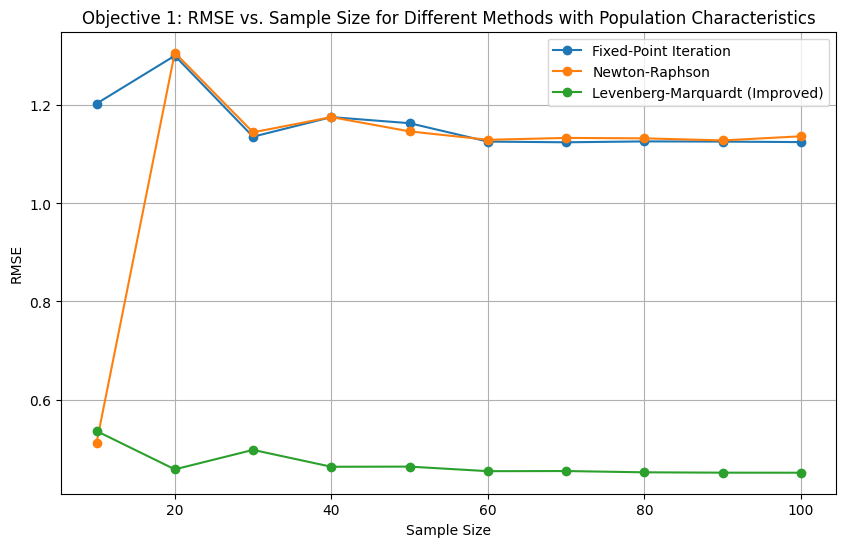

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data with population characteristics
def generate_population_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Simulate data with specific population characteristics
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
population_noise_std = 0.5  # Population noise standard deviation

y_data_population = generate_population_data(x_data, true_params, population_noise_std)

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Generate data for different sample sizes
sample_data = generate_sample_sizes(x_data, y_data_population, sample_sizes)

# Placeholder for RMSE values
rmse_fixed_point = []
rmse_newton_raphson = []
rmse_levenberg_marquardt = []

# Initial parameter guess
initial_params = np.array([1.0, -1.0, 0.5])

# Fixed-Point Iteration
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    for i in range(100):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        params += 0.01 * np.array([np.sum(error * np.sin(params[1] * x_sample)),
                                   np.sum(error * params[0] * x_sample * np.cos(params[1] * x_sample)),
                                   np.sum(error)])
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_fixed_point.append(rmse(y_data_population, y_pred_full))

# Newton-Raphson
for x_sample, y_sample in sample_data:
    params = initial_params.copy()
    for i in range(10):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        J = np.vstack((np.sin(params[1] * x_sample),
                       params[0] * x_sample * np.cos(params[1] * x_sample),
                       np.ones_like(x_sample))).T
        H = J.T @ J
        params += np.linalg.inv(H) @ J.T @ error
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_newton_raphson.append(rmse(y_data_population, y_pred_full))

# Levenberg-Marquardt with Improved Initialization and Tuned Lambda
rmse_levenberg_marquardt_improved = []

# Improved Initial Parameter Guess
initial_params_lm = np.array([1.5, -2.0, 1.0])

# Tuned Lambda Parameter
lambda_param = 0.1

for x_sample, y_sample in sample_data:
    params = initial_params_lm.copy()
    for i in range(10):
        y_pred = params[0] * np.sin(params[1] * x_sample) + params[2]
        error = y_sample - y_pred
        J = np.vstack((np.sin(params[1] * x_sample),
                       params[0] * x_sample * np.cos(params[1] * x_sample),
                       np.ones_like(x_sample))).T
        H = J.T @ J
        params += np.linalg.inv(H + lambda_param * np.eye(3)) @ J.T @ error
    y_pred_full = params[0] * np.sin(params[1] * x_data) + params[2]
    rmse_levenberg_marquardt_improved.append(rmse(y_data_population, y_pred_full))

# Print RMSE values
print("Objective 1: Evaluate Three Non-linear Iterative Estimation Techniques with Population Characteristics")
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE (Improved)")
for size, rmse_fp, rmse_nr, rmse_lm_improved in zip(sample_sizes, rmse_fixed_point, rmse_newton_raphson, rmse_levenberg_marquardt_improved):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm_improved:.4f}")

# Plotting RMSE vs. Sample Size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_fixed_point, label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_newton_raphson, label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_levenberg_marquardt_improved, label='Levenberg-Marquardt (Improved)', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('Objective 1: RMSE vs. Sample Size for Different Methods with Population Characteristics')
plt.legend()
plt.grid(True)
plt.show()


Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2034				0.5113			0.5358
20		1.3012				1.3073			1.3073
30		1.1360				1.1449			1.1449
40		1.1759				1.1759			1.1759
50		1.1635				1.1468			1.1617
60		1.1260				1.1297			1.1371
70		1.1246				1.1335			1.1335
80		1.1264				1.1326			1.1326
90		1.1260				1.1284			1.1307
100		1.1250				1.1369			1.1271


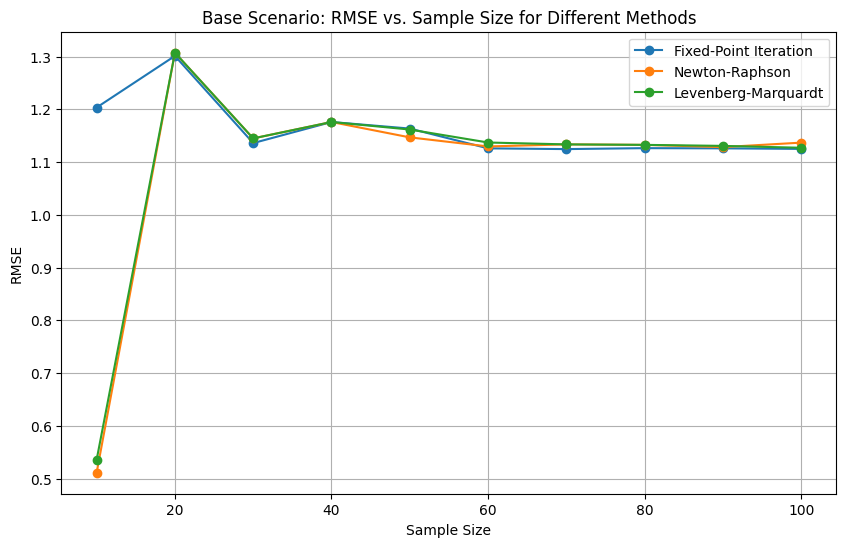


Population Characteristic: Base Scenario
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.4858				1.4876			1.4876
20		1.1160				1.2096			1.2096
30		1.1445				0.4629			1.1667
40		1.1235				1.1336			1.1336
50		1.1316				1.1316			1.1316
60		1.1365				1.1847			1.1216
70		1.1298				1.1281			1.1189
80		1.1271				1.1276			1.1275
90		1.1290				1.1285			1.1285
100		1.1319				0.4567			1.1100


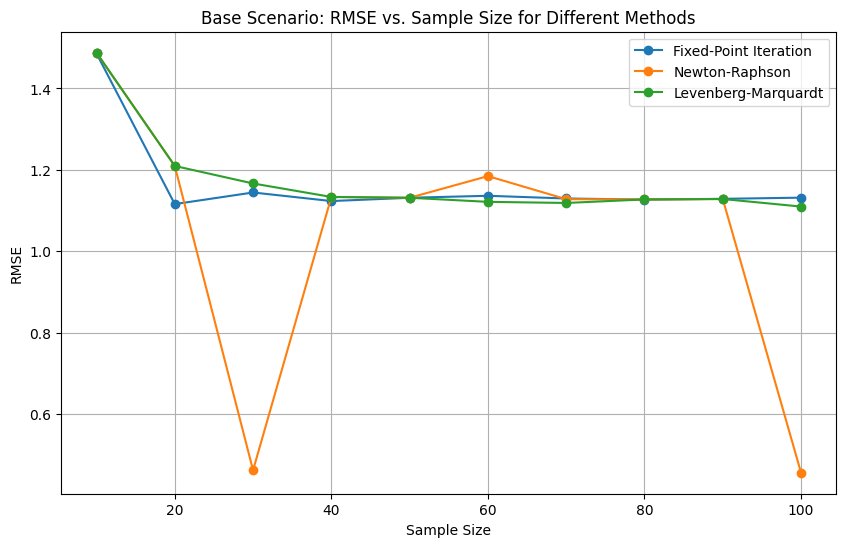


Population Characteristic: Higher Amplitude
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.3706				1.5859			1.5859
20		1.1843				1.1656			1.1679
30		1.2188				1.1501			1.1804
40		1.2096				1.2062			1.2062
50		1.1271				1.1573			1.1577
60		1.1374				1.1191			1.1410
70		1.1408				1.1451			1.1428
80		1.1392				1.1392			1.1392
90		1.1237				1.1250			1.1752
100		1.1238				1.1288			1.1279


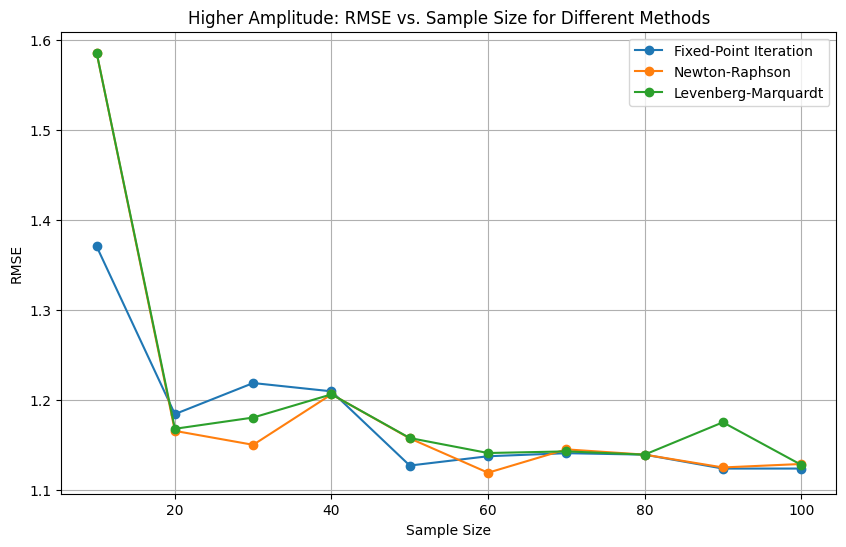


Population Characteristic: Higher Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2221				1.2197			1.2197
20		1.1323				1.1323			1.1323
30		1.1392				1.1389			1.1390
40		1.1627				1.1627			1.1627
50		1.1522				1.1738			1.1300
60		1.1560				1.1291			1.1185
70		1.1401				1.1496			1.1497
80		1.1333				1.1398			1.1312
90		1.1332				1.1357			1.1335
100		1.1421				1.1296			1.1295


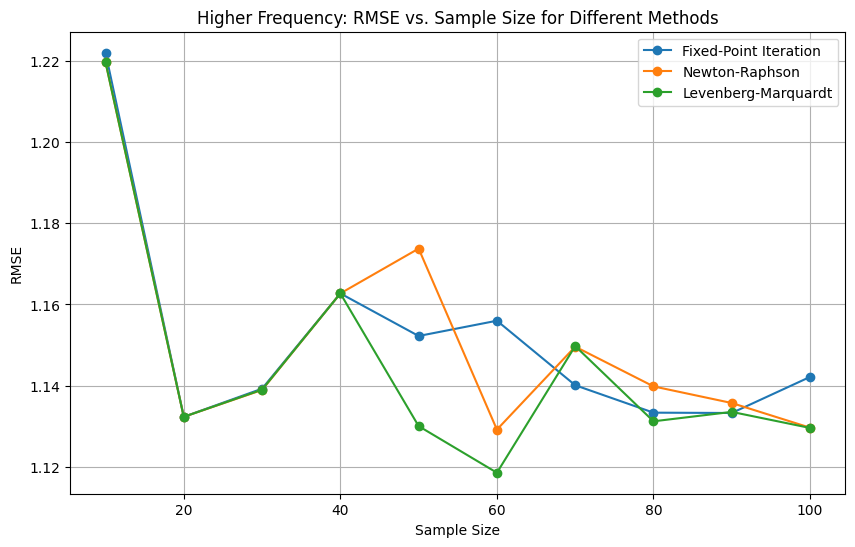


Population Characteristic: Lower Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.3211				1.4205			1.5282
20		1.1984				1.1979			1.1979
30		1.1358				1.1938			1.1938
40		1.1641				166.7125			1.1328
50		1.1294				1.1948			1.2440
60		1.1351				1.1490			1.1491
70		1.1331				1.1341			1.1341
80		1.1362				1.1314			1.1152
90		1.1342				1.1457			1.1335
100		1.1298				1.1219			1.1456


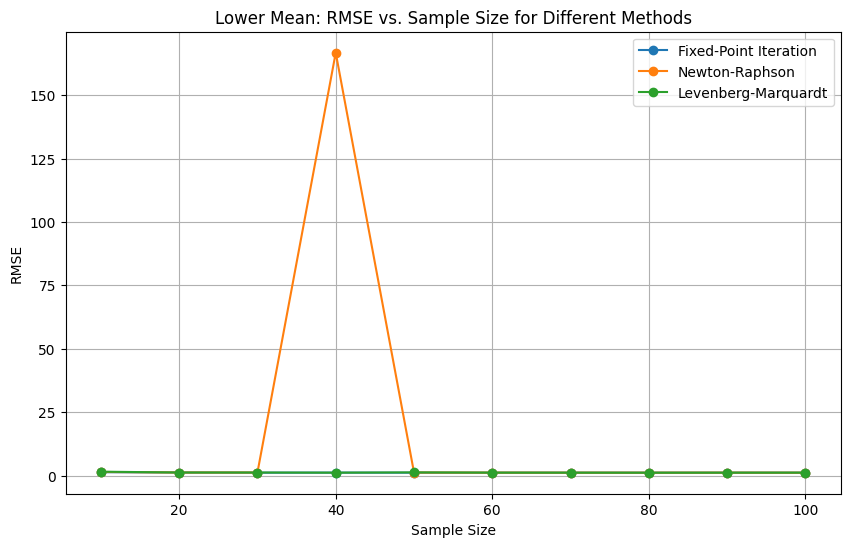


Population Characteristic: Higher Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.1815				1.3146			1.3143
20		1.2225				1.1364			1.1359
30		1.2883				1.2883			1.2883
40		1.1295				1.1564			1.1564
50		1.1455				1.1670			1.1670
60		1.1345				1.1386			1.1341
70		1.1333				1.1041			1.1173
80		1.1510				1.1441			1.1503
90		1.1489				0.4815			1.1441
100		1.1409				1.1369			1.1386


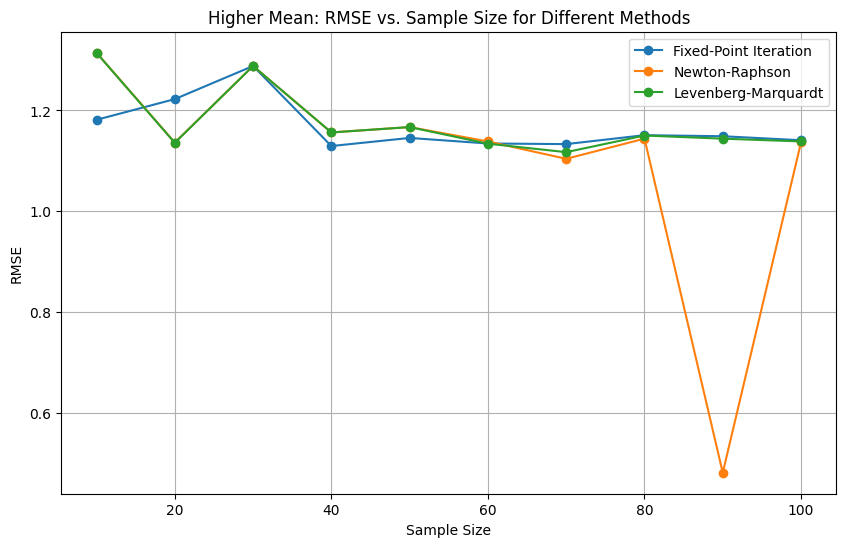


Population Characteristic: Shifted Phase (Different Trend)
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2322				1.2176			1.2302
20		1.1416				1.1439			1.1355
30		1.1249				1.1312			1.1326
40		1.1298				2.4563			1.1284
50		1.1317				1.1681			1.1681
60		1.1356				1.1367			1.1319
70		1.1319				1.1501			1.1309
80		1.1367				1.1488			1.1689
90		1.1456				1.1381			1.1394
100		1.1334				1.2281			1.1882


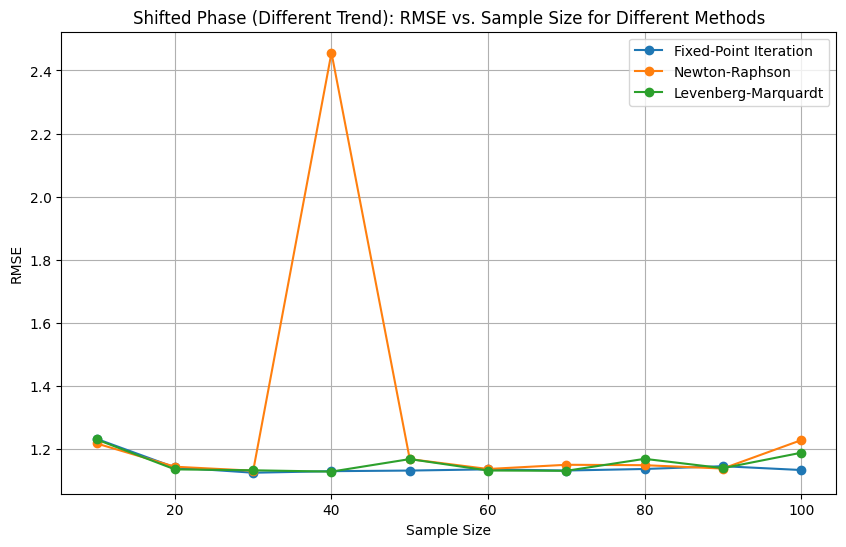


Population Characteristic: Lower Amplitude, Lower Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2455				1.2423			1.2432
20		1.1559				1.1816			1.1817
30		1.2099				1.2155			1.1807
40		1.1425				1.2255			1.1371
50		1.1278				1.1682			1.1472
60		1.1333				1.1548			1.1374
70		1.1465				1.1190			1.7397
80		1.1363				1.1282			1.1284
90		1.1366				1.1321			1.1319
100		1.1357				1.1295			1.1349


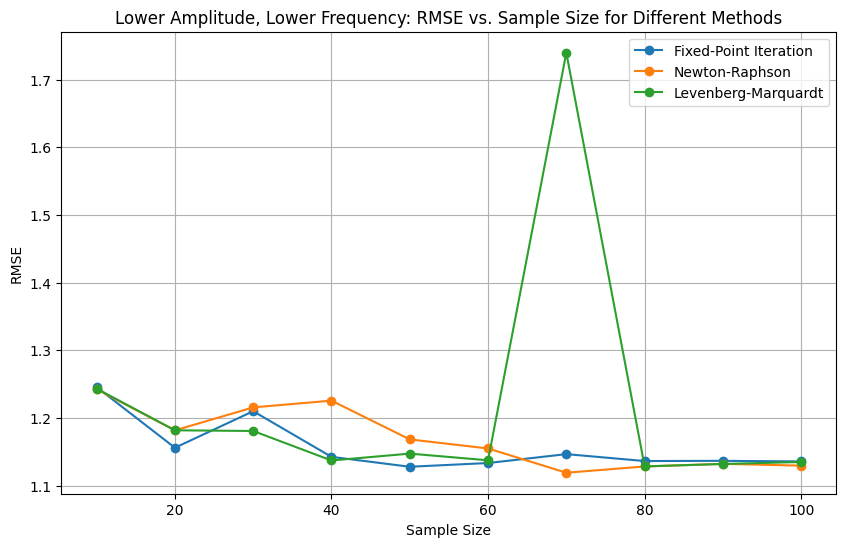


Population Characteristic: Higher Amplitude, Shifted Phase
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE
10		1.2549				1.2783			1.2208
20		1.2235				1.2110			2.2810
30		1.1560				1.1560			1.1560
40		1.1849				1.1846			1.1847
50		1.1395				1.1316			1.1300
60		1.1320				1.1622			1.1622
70		1.1273				1.1270			1.1397
80		1.1459				1.2073			1.1269
90		1.1274				1.1575			1.1250
100		1.1293				1.1382			1.1543


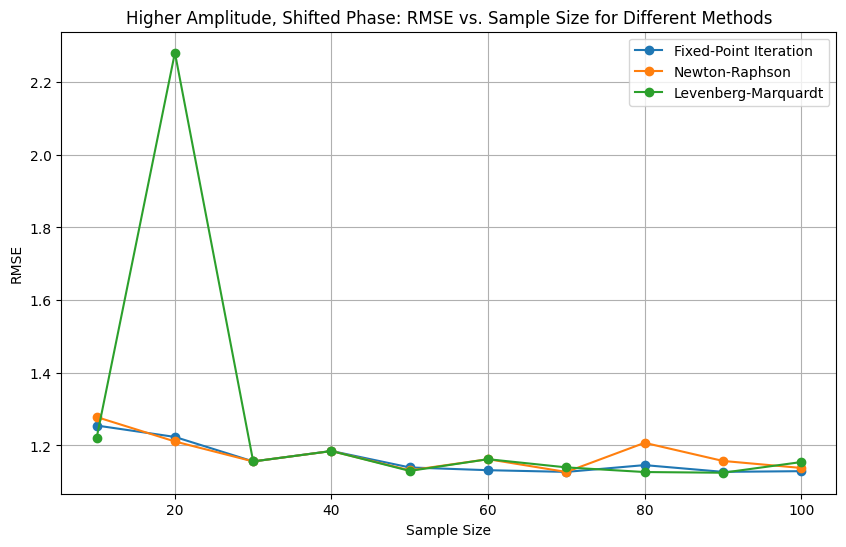

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with different population characteristics
def simulate_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Parameters for simulation
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
noise_std = 0.5

# Generate data for base scenario
y_data_base = simulate_data(x_data, true_params, noise_std)

# Different population characteristics
population_params = [
    np.array([1.5, -2.0, 1.0]),  # Base scenario (same as before)
    np.array([1.8, -2.0, 1.0]),  # Higher amplitude
    np.array([1.5, -1.8, 1.0]),  # Higher frequency
    np.array([1.5, -2.0, 0.8]),  # Lower mean
    np.array([1.5, -2.0, 1.2]),  # Higher mean
    np.array([1.5, -2.2, 1.0]),  # Shifted phase (different trend)
    np.array([1.3, -1.8, 1.0]),  # Lower amplitude, lower frequency
    np.array([1.8, -2.2, 1.2])   # Higher amplitude, shifted phase
]
population_labels = [
    'Base Scenario', 'Higher Amplitude', 'Higher Frequency',
    'Lower Mean', 'Higher Mean', 'Shifted Phase (Different Trend)',
    'Lower Amplitude, Lower Frequency', 'Higher Amplitude, Shifted Phase'
]

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Placeholder for RMSE values
rmse_methods = {
    'Fixed-Point Iteration': [],
    'Newton-Raphson': [],
    'Levenberg-Marquardt': []
}

# Initial parameter guess
initial_params = np.array([1.0, -1.0, 0.5])

# Function to evaluate methods with different data
def evaluate_methods(sample_data, initial_params):
    rmse_values = {method: [] for method in rmse_methods}

    for x_sample, y_sample in sample_data:
        # Fixed-Point Iteration
        params_fp = initial_params.copy()
        for i in range(100):
            y_pred_fp = params_fp[0] * np.sin(params_fp[1] * x_sample) + params_fp[2]
            error_fp = y_sample - y_pred_fp
            params_fp += 0.01 * np.array([
                np.sum(error_fp * np.sin(params_fp[1] * x_sample)),
                np.sum(error_fp * params_fp[0] * x_sample * np.cos(params_fp[1] * x_sample)),
                np.sum(error_fp)
            ])
        y_pred_full_fp = params_fp[0] * np.sin(params_fp[1] * x_data) + params_fp[2]
        rmse_values['Fixed-Point Iteration'].append(rmse(y_data_base, y_pred_full_fp))

        # Newton-Raphson
        params_nr = initial_params.copy()
        for i in range(10):
            y_pred_nr = params_nr[0] * np.sin(params_nr[1] * x_sample) + params_nr[2]
            error_nr = y_sample - y_pred_nr
            J_nr = np.vstack((
                np.sin(params_nr[1] * x_sample),
                params_nr[0] * x_sample * np.cos(params_nr[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_nr = J_nr.T @ J_nr
            params_nr += np.linalg.inv(H_nr) @ J_nr.T @ error_nr
        y_pred_full_nr = params_nr[0] * np.sin(params_nr[1] * x_data) + params_nr[2]
        rmse_values['Newton-Raphson'].append(rmse(y_data_base, y_pred_full_nr))

        # Levenberg-Marquardt
        params_lm = initial_params.copy()
        lambda_param = 0.1
        for i in range(10):
            y_pred_lm = params_lm[0] * np.sin(params_lm[1] * x_sample) + params_lm[2]
            error_lm = y_sample - y_pred_lm
            J_lm = np.vstack((
                np.sin(params_lm[1] * x_sample),
                params_lm[0] * x_sample * np.cos(params_lm[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_lm = J_lm.T @ J_lm
            params_lm += np.linalg.inv(H_lm + lambda_param * np.eye(3)) @ J_lm.T @ error_lm
        y_pred_full_lm = params_lm[0] * np.sin(params_lm[1] * x_data) + params_lm[2]
        rmse_values['Levenberg-Marquardt'].append(rmse(y_data_base, y_pred_full_lm))

    return rmse_values

# Evaluate methods for base scenario
rmse_methods_base = evaluate_methods(generate_sample_sizes(x_data, y_data_base, sample_sizes), initial_params)

# Evaluate methods for different population characteristics
rmse_methods_characteristics = []
for params in population_params:
    y_data_characteristic = simulate_data(x_data, params, noise_std)
    rmse_characteristic = evaluate_methods(generate_sample_sizes(x_data, y_data_characteristic, sample_sizes), initial_params)
    rmse_methods_characteristics.append(rmse_characteristic)

# Print and plot results for base scenario
print("Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques")
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], rmse_methods_base['Newton-Raphson'], rmse_methods_base['Levenberg-Marquardt']):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

# Plot RMSE vs. Sample Size for base scenario
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Newton-Raphson'], label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('Base Scenario: RMSE vs. Sample Size for Different Methods')
plt.legend()
plt.grid(True)
plt.show()

# Print and plot results for different population characteristics
for i, (params, label) in enumerate(zip(population_params, population_labels)):
    print(f"\nPopulation Characteristic: {label}")
    print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE")
    for size, rmse_fp, rmse_nr, rmse_lm in zip(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], rmse_methods_characteristics[i]['Newton-Raphson'], rmse_methods_characteristics[i]['Levenberg-Marquardt']):
        print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}")

    # Plot RMSE vs. Sample Size for different population characteristics
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Newton-Raphson'], label='Newton-Raphson', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
    plt.xlabel('Sample Size')
    plt.ylabel('RMSE')
    plt.title(f"{label}: RMSE vs. Sample Size for Different Methods")
    plt.legend()
    plt.grid(True)
    plt.show()



Base Scenario: Evaluate Three Non-linear Iterative Estimation Techniques
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.2034				0.5113			0.5358			0.5358
20		1.3012				1.3073			1.3073			0.4576
30		1.1360				1.1449			1.1449			0.4973
40		1.1759				1.1759			1.1759			0.4629
50		1.1635				1.1468			1.1617			0.4632
60		1.1260				1.1297			1.1371			0.4539
70		1.1246				1.1335			1.1335			0.4542
80		1.1264				1.1326			1.1326			0.4516
90		1.1260				1.1284			1.1307			0.4509
100		1.1250				1.1369			1.1271			0.4508


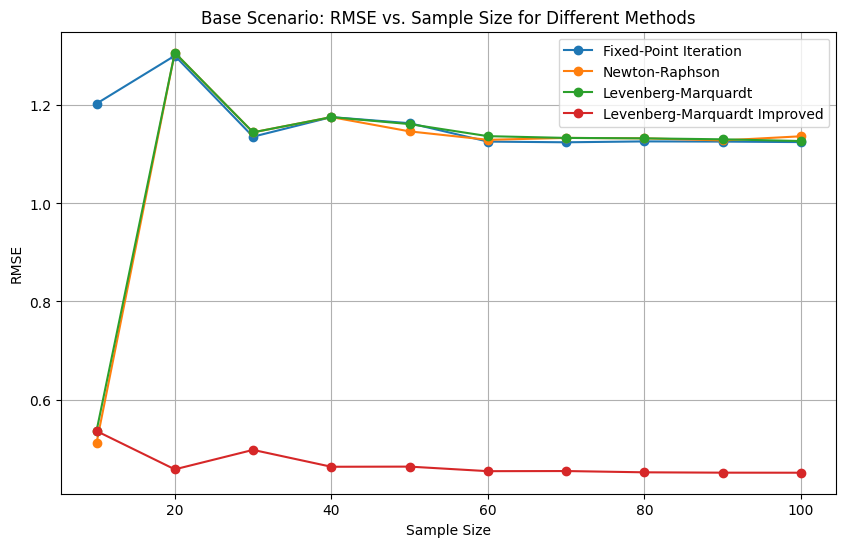


Population Characteristic: Base Scenario
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.4858				1.4876			1.4876			0.5422
20		1.1160				1.2096			1.2096			0.4976
30		1.1445				0.4629			1.1667			0.4629
40		1.1235				1.1336			1.1336			0.4564
50		1.1316				1.1316			1.1316			0.4736
60		1.1365				1.1847			1.1216			0.4524
70		1.1298				1.1281			1.1189			0.4733
80		1.1271				1.1276			1.1275			0.4553
90		1.1290				1.1285			1.1285			0.4573
100		1.1319				0.4567			1.1100			0.4567


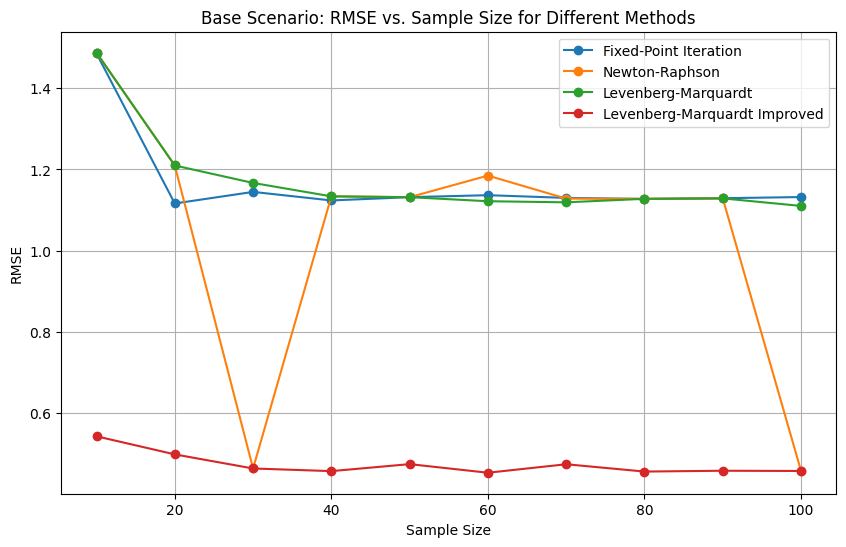


Population Characteristic: Higher Amplitude
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.3706				1.5859			1.5859			0.6235
20		1.1843				1.1656			1.1679			0.5912
30		1.2188				1.1501			1.1804			0.5366
40		1.2096				1.2062			1.2062			0.5622
50		1.1271				1.1573			1.1577			0.5123
60		1.1374				1.1191			1.1410			0.5186
70		1.1408				1.1451			1.1428			0.5359
80		1.1392				1.1392			1.1392			0.5009
90		1.1237				1.1250			1.1752			0.5181
100		1.1238				1.1288			1.1279			0.5113


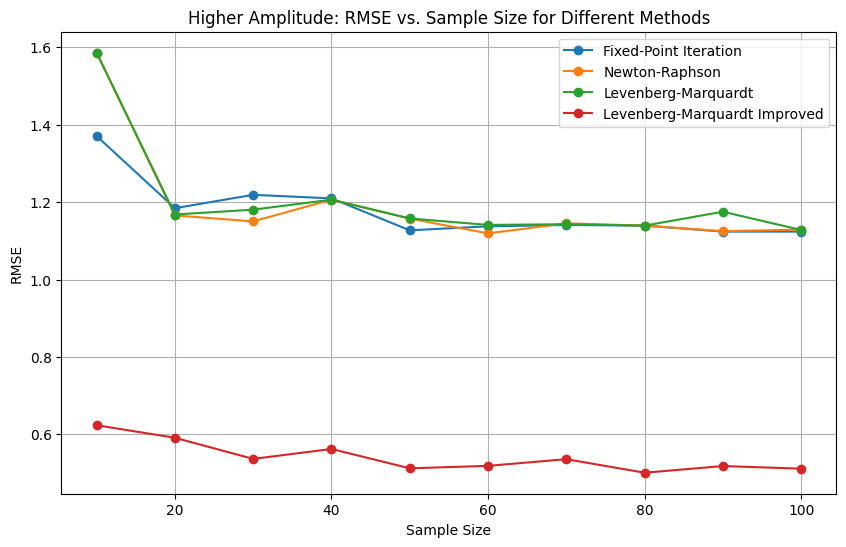


Population Characteristic: Higher Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.2221				1.2197			1.2197			1.1541
20		1.1323				1.1323			1.1323			1.1119
30		1.1392				1.1389			1.1390			1.1063
40		1.1627				1.1627			1.1627			1.0924
50		1.1522				1.1738			1.1300			1.0945
60		1.1560				1.1291			1.1185			1.0913
70		1.1401				1.1496			1.1497			1.0975
80		1.1333				1.1398			1.1312			1.1100
90		1.1332				1.1357			1.1335			1.0926
100		1.1421				1.1296			1.1295			1.1054


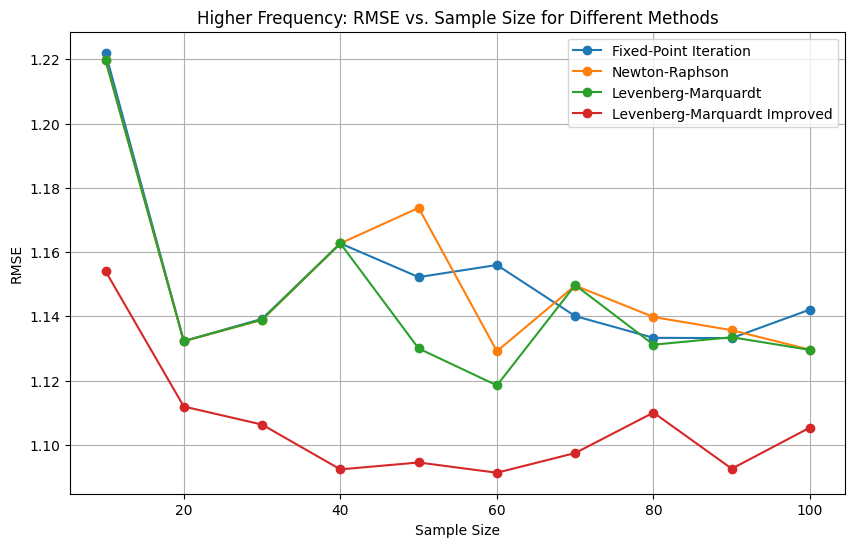


Population Characteristic: Lower Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.3211				1.4205			1.5282			0.6328
20		1.1984				1.1979			1.1979			0.4640
30		1.1358				1.1938			1.1938			0.4567
40		1.1641				166.7125			1.1328			0.4534
50		1.1294				1.1948			1.2440			0.4679
60		1.1351				1.1490			1.1491			0.4685
70		1.1331				1.1341			1.1341			0.4696
80		1.1362				1.1314			1.1152			0.4584
90		1.1342				1.1457			1.1335			0.4643
100		1.1298				1.1219			1.1456			0.4601


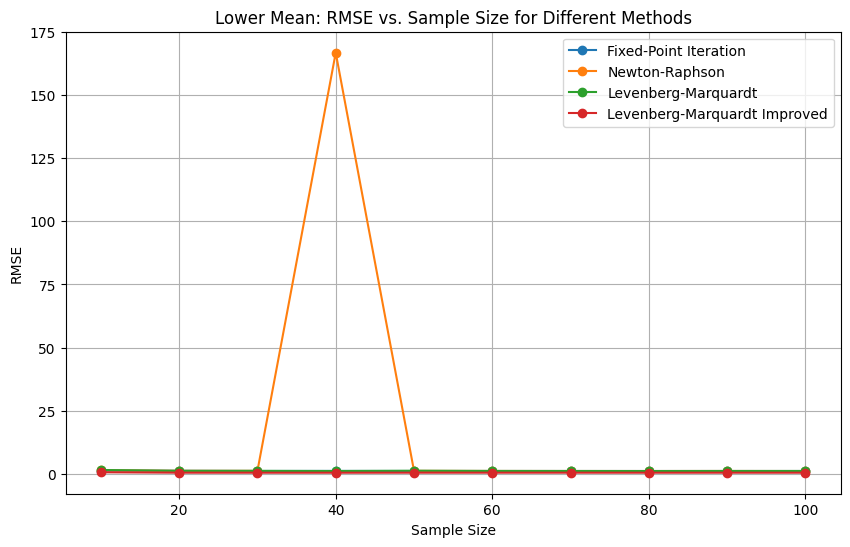


Population Characteristic: Higher Mean
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.1815				1.3146			1.3143			0.4823
20		1.2225				1.1364			1.1359			0.5313
30		1.2883				1.2883			1.2883			0.5021
40		1.1295				1.1564			1.1564			0.4772
50		1.1455				1.1670			1.1670			0.4858
60		1.1345				1.1386			1.1341			0.4879
70		1.1333				1.1041			1.1173			0.4864
80		1.1510				1.1441			1.1503			0.4858
90		1.1489				0.4815			1.1441			0.4815
100		1.1409				1.1369			1.1386			0.4829


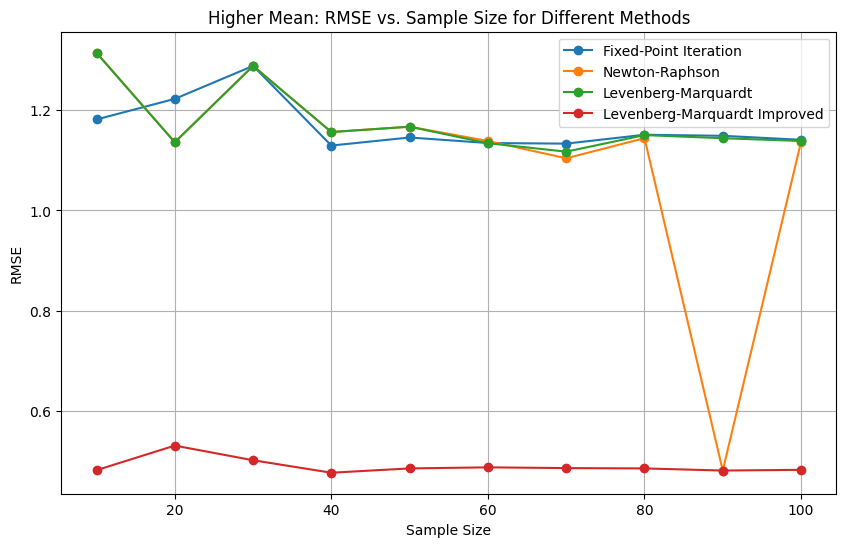


Population Characteristic: Shifted Phase (Different Trend)
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.2322				1.2176			1.2302			1.1574
20		1.1416				1.1439			1.1355			1.4217
30		1.1249				1.1312			1.1326			1.3719
40		1.1298				2.4563			1.1284			1.1317
50		1.1317				1.1681			1.1681			1.2029
60		1.1356				1.1367			1.1319			1.2398
70		1.1319				1.1501			1.1309			1.2210
80		1.1367				1.1488			1.1689			1.2314
90		1.1456				1.1381			1.1394			1.2425
100		1.1334				1.2281			1.1882			1.2411


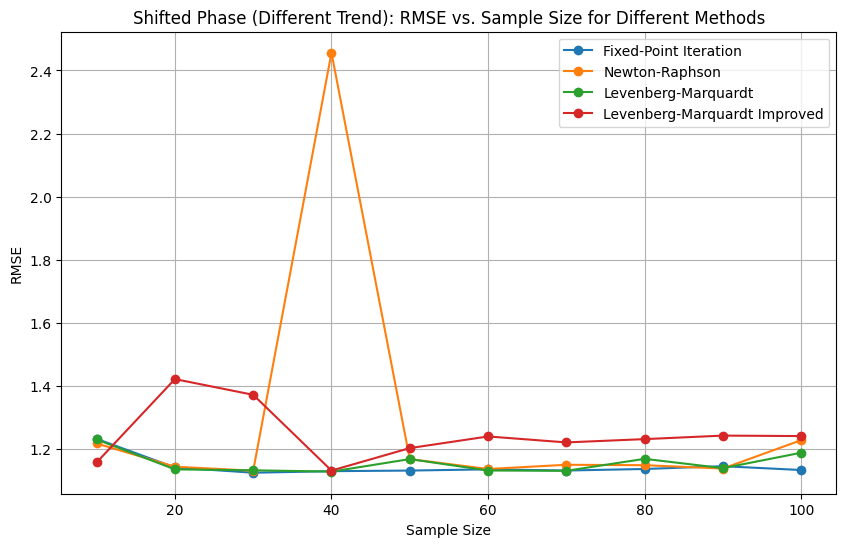


Population Characteristic: Lower Amplitude, Lower Frequency
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.2455				1.2423			1.2432			0.9755
20		1.1559				1.1816			1.1817			1.0096
30		1.2099				1.2155			1.1807			1.0525
40		1.1425				1.2255			1.1371			1.0577
50		1.1278				1.1682			1.1472			0.9901
60		1.1333				1.1548			1.1374			1.1118
70		1.1465				1.1190			1.7397			1.1060
80		1.1363				1.1282			1.1284			1.0886
90		1.1366				1.1321			1.1319			1.0963
100		1.1357				1.1295			1.1349			1.1083


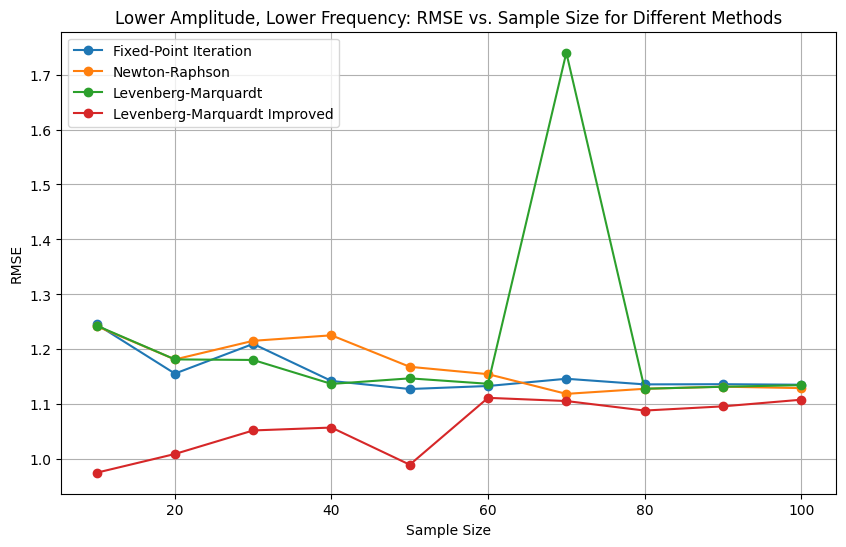


Population Characteristic: Higher Amplitude, Shifted Phase
Sample Size	Fixed-Point Iteration RMSE	Newton-Raphson RMSE	Levenberg-Marquardt RMSE	Levenberg-Marquardt Improved RMSE
10		1.2549				1.2783			1.2208			1.0679
20		1.2235				1.2110			2.2810			1.1873
30		1.1560				1.1560			1.1560			1.2641
40		1.1849				1.1846			1.1847			1.3060
50		1.1395				1.1316			1.1300			1.3030
60		1.1320				1.1622			1.1622			1.2621
70		1.1273				1.1270			1.1397			1.2146
80		1.1459				1.2073			1.1269			1.2323
90		1.1274				1.1575			1.1250			1.2437
100		1.1293				1.1382			1.1543			1.2522


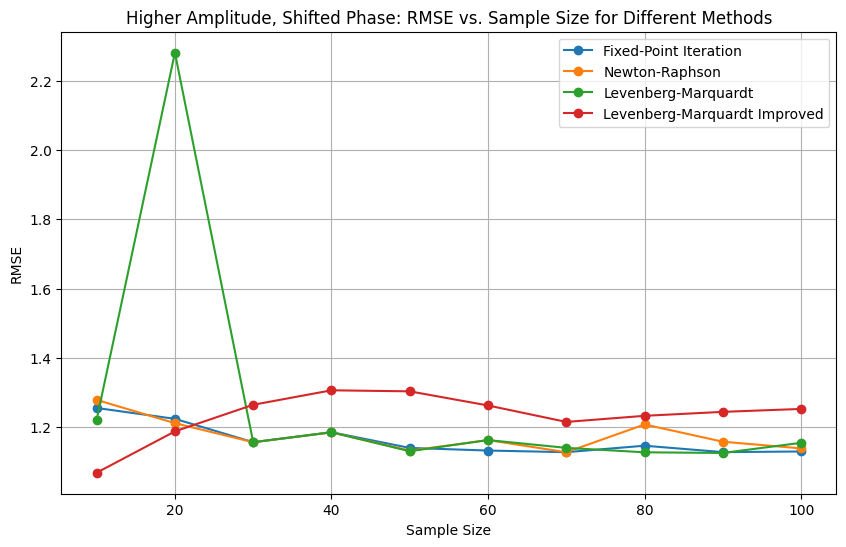

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with different population characteristics
def simulate_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Parameters for simulation
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
noise_std = 0.5

# Generate data for base scenario
y_data_base = simulate_data(x_data, true_params, noise_std)

# Different population characteristics
population_params = [
    np.array([1.5, -2.0, 1.0]),  # Base scenario (same as before)
    np.array([1.8, -2.0, 1.0]),  # Higher amplitude
    np.array([1.5, -1.8, 1.0]),  # Higher frequency
    np.array([1.5, -2.0, 0.8]),  # Lower mean
    np.array([1.5, -2.0, 1.2]),  # Higher mean
    np.array([1.5, -2.2, 1.0]),  # Shifted phase (different trend)
    np.array([1.3, -1.8, 1.0]),  # Lower amplitude, lower frequency
    np.array([1.8, -2.2, 1.2])   # Higher amplitude, shifted phase
]
population_labels = [
    'Base Scenario', 'Higher Amplitude', 'Higher Frequency',
    'Lower Mean', 'Higher Mean', 'Shifted Phase (Different Trend)',
    'Lower Amplitude, Lower Frequency', 'Higher Amplitude, Shifted Phase'
]

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Placeholder for RMSE values
rmse_methods = {
    'Fixed-Point Iteration': [],
    'Newton-Raphson': [],
    'Levenberg-Marquardt': [],
    'Levenberg-Marquardt Improved': []  # Added for the improved version
}

# Initial parameter guesses
initial_params = np.array([1.0, -1.0, 0.5])
initial_params_lm = np.array([1.5, -2.0, 1.0])  # Improved initial guess

# Function to evaluate methods with different data
def evaluate_methods(sample_data, initial_params, initial_params_lm):
    rmse_values = {method: [] for method in rmse_methods}

    for x_sample, y_sample in sample_data:
        # Fixed-Point Iteration
        params_fp = initial_params.copy()
        for i in range(100):
            y_pred_fp = params_fp[0] * np.sin(params_fp[1] * x_sample) + params_fp[2]
            error_fp = y_sample - y_pred_fp
            params_fp += 0.01 * np.array([
                np.sum(error_fp * np.sin(params_fp[1] * x_sample)),
                np.sum(error_fp * params_fp[0] * x_sample * np.cos(params_fp[1] * x_sample)),
                np.sum(error_fp)
            ])
        y_pred_full_fp = params_fp[0] * np.sin(params_fp[1] * x_data) + params_fp[2]
        rmse_values['Fixed-Point Iteration'].append(rmse(y_data_base, y_pred_full_fp))

        # Newton-Raphson
        params_nr = initial_params.copy()
        for i in range(10):
            y_pred_nr = params_nr[0] * np.sin(params_nr[1] * x_sample) + params_nr[2]
            error_nr = y_sample - y_pred_nr
            J_nr = np.vstack((
                np.sin(params_nr[1] * x_sample),
                params_nr[0] * x_sample * np.cos(params_nr[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_nr = J_nr.T @ J_nr
            params_nr += np.linalg.inv(H_nr) @ J_nr.T @ error_nr
        y_pred_full_nr = params_nr[0] * np.sin(params_nr[1] * x_data) + params_nr[2]
        rmse_values['Newton-Raphson'].append(rmse(y_data_base, y_pred_full_nr))

        # Levenberg-Marquardt
        params_lm = initial_params.copy()
        lambda_param = 0.1
        for i in range(10):
            y_pred_lm = params_lm[0] * np.sin(params_lm[1] * x_sample) + params_lm[2]
            error_lm = y_sample - y_pred_lm
            J_lm = np.vstack((
                np.sin(params_lm[1] * x_sample),
                params_lm[0] * x_sample * np.cos(params_lm[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_lm = J_lm.T @ J_lm
            params_lm += np.linalg.inv(H_lm + lambda_param * np.eye(3)) @ J_lm.T @ error_lm
        y_pred_full_lm = params_lm[0] * np.sin(params_lm[1] * x_data) + params_lm[2]
        rmse_values['Levenberg-Marquardt'].append(rmse(y_data_base, y_pred_full_lm))

        # Levenberg-Marquardt Improved
        params_lm_improved = initial_params_lm.copy()
        lambda_param_improved = 0.1
        for i in range(10):
            y_pred_lm_improved = params_lm_improved[0] * np.sin(params_lm_improved[1] * x_sample) + params_lm_improved[2]
            error_lm_improved = y_sample - y_pred_lm_improved
            J_lm_improved = np.vstack((
                np.sin(params_lm_improved[1] * x_sample),
                params_lm_improved[0] * x_sample * np.cos(params_lm_improved[1] * x_sample),
                np.ones_like(x_sample)
            )).T
            H_lm_improved = J_lm_improved.T @ J_lm_improved
            params_lm_improved += np.linalg.inv(H_lm_improved + lambda_param_improved * np.eye(3)) @ J_lm_improved.T @ error_lm_improved
        y_pred_full_lm_improved = params_lm_improved[0] * np.sin(params_lm_improved[1] * x_data) + params_lm_improved[2]
        rmse_values['Levenberg-Marquardt Improved'].append(rmse(y_data_base, y_pred_full_lm_improved))

    return rmse_values

# Evaluate methods for base scenario
rmse_methods_base = evaluate_methods(generate_sample_sizes(x_data, y_data_base, sample_sizes), initial_params, initial_params_lm)

# Evaluate methods for different population characteristics
rmse_methods_characteristics = []
for params in population_params:
    y_data_characteristic = simulate_data(x_data, params, noise_std)
    rmse_characteristic = evaluate_methods(generate_sample_sizes(x_data, y_data_characteristic, sample_sizes), initial_params, initial_params_lm)
    rmse_methods_characteristics.append(rmse_characteristic)

# Print and plot results for base scenario
print("\nBase Scenario: Evaluate Three Non-linear Iterative Estimation Techniques")
print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE\tLevenberg-Marquardt Improved RMSE")
for size, rmse_fp, rmse_nr, rmse_lm, rmse_lm_improved in zip(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], rmse_methods_base['Newton-Raphson'], rmse_methods_base['Levenberg-Marquardt'], rmse_methods_base['Levenberg-Marquardt Improved']):
    print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}\t\t\t{rmse_lm_improved:.4f}")

# Plot RMSE vs. Sample Size for base scenario
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, rmse_methods_base['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Newton-Raphson'], label='Newton-Raphson', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
plt.plot(sample_sizes, rmse_methods_base['Levenberg-Marquardt Improved'], label='Levenberg-Marquardt Improved', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('Base Scenario: RMSE vs. Sample Size for Different Methods')
plt.legend()
plt.grid(True)
plt.show()

# Print and plot results for different population characteristics
for i, (params, label) in enumerate(zip(population_params, population_labels)):
    print(f"\nPopulation Characteristic: {label}")
    print("Sample Size\tFixed-Point Iteration RMSE\tNewton-Raphson RMSE\tLevenberg-Marquardt RMSE\tLevenberg-Marquardt Improved RMSE")
    for size, rmse_fp, rmse_nr, rmse_lm, rmse_lm_improved in zip(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], rmse_methods_characteristics[i]['Newton-Raphson'], rmse_methods_characteristics[i]['Levenberg-Marquardt'], rmse_methods_characteristics[i]['Levenberg-Marquardt Improved']):
        print(f"{size}\t\t{rmse_fp:.4f}\t\t\t\t{rmse_nr:.4f}\t\t\t{rmse_lm:.4f}\t\t\t{rmse_lm_improved:.4f}")

    # Plot RMSE vs. Sample Size for different population characteristics
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Fixed-Point Iteration'], label='Fixed-Point Iteration', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Newton-Raphson'], label='Newton-Raphson', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Levenberg-Marquardt'], label='Levenberg-Marquardt', marker='o')
    plt.plot(sample_sizes, rmse_methods_characteristics[i]['Levenberg-Marquardt Improved'], label='Levenberg-Marquardt Improved', marker='o')
    plt.xlabel('Sample Size')
    plt.ylabel('RMSE')
    plt.title(f"{label}: RMSE vs. Sample Size for Different Methods")
    plt.legend()
    plt.grid(True)
    plt.show()



Convergence Criterion: 0.0001
Sample Size	Iterations	RMSE
10		4		0.5358
20		4		0.4576
30		4		0.4973
40		4		0.4629
50		4		0.4632
60		3		0.4539
70		3		0.4542
80		4		0.4516
90		3		0.4509
100		3		0.4508

Convergence Criterion: 1e-05
Sample Size	Iterations	RMSE
10		6		0.4967
20		3		0.4600
30		4		0.4631
40		4		0.4572
50		4		0.4545
60		3		0.4530
70		4		0.4515
80		3		0.4522
90		3		0.4513
100		3		0.4508

Convergence Criterion: 1e-06
Sample Size	Iterations	RMSE
10		5		0.5765
20		5		0.4543
30		4		0.4900
40		3		0.4559
50		3		0.4524
60		3		0.4529
70		4		0.4529
80		3		0.4524
90		3		0.4519
100		3		0.4508

Convergence Criterion: 1e-07
Sample Size	Iterations	RMSE
10		5		0.4973
20		5		0.5090
30		4		0.4564
40		5		0.4596
50		3		0.4514
60		4		0.4679
70		3		0.4539
80		3		0.4569
90		3		0.4508
100		3		0.4508


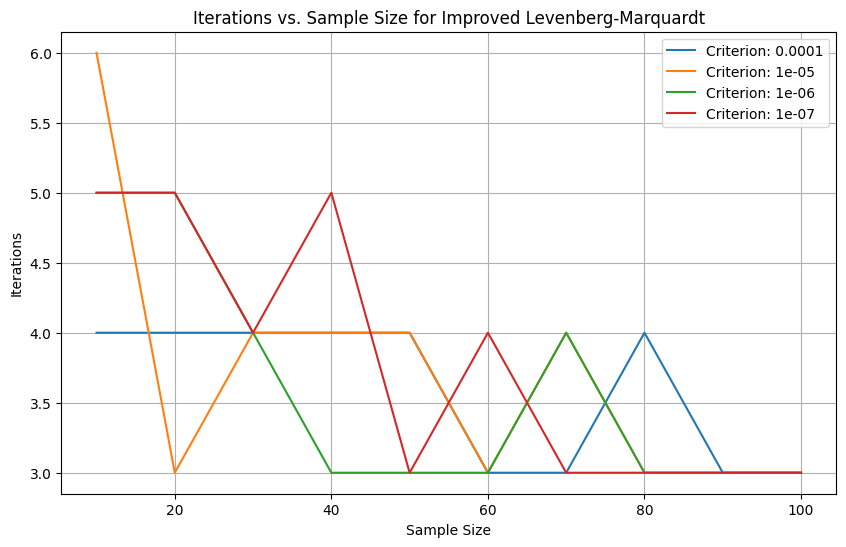

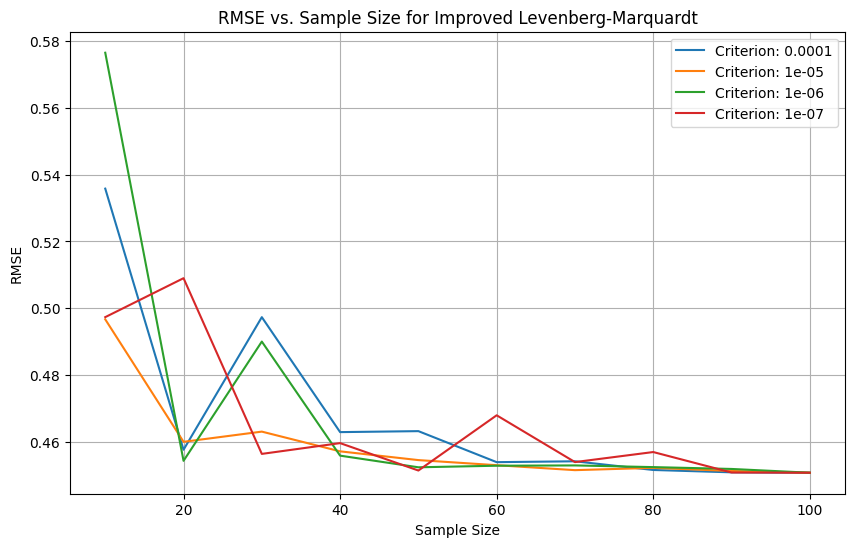

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with different population characteristics
def simulate_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Parameters for simulation
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
noise_std = 0.5

# Generate data for base scenario
y_data_base = simulate_data(x_data, true_params, noise_std)

# Improved Initial Parameter Guess
initial_params_lm = np.array([1.5, -2.0, 1.0])

# Convergence criteria to test
convergence_criteria = [1e-4, 1e-5, 1e-6, 1e-7]

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Placeholder for results
results = []

# Evaluate the algorithm for each convergence criterion
for criterion in convergence_criteria:
    rmse_values = []
    iterations = []
    for size in sample_sizes:
        sample_data = generate_sample_sizes(x_data, y_data_base, [size])[0]

        params_lm = initial_params_lm.copy()
        iter_count = 0
        while True:
            y_pred_lm = params_lm[0] * np.sin(params_lm[1] * sample_data[0]) + params_lm[2]
            error_lm = sample_data[1] - y_pred_lm
            J_lm = np.vstack((
                np.sin(params_lm[1] * sample_data[0]),
                params_lm[0] * sample_data[0] * np.cos(params_lm[1] * sample_data[0]),
                np.ones_like(sample_data[0])
            )).T
            H_lm = J_lm.T @ J_lm
            params_lm_new = params_lm + np.linalg.inv(H_lm + criterion * np.eye(3)) @ J_lm.T @ error_lm
            iter_count += 1
            if np.allclose(params_lm, params_lm_new, rtol=1e-6):
                break
            params_lm = params_lm_new

        y_pred_full_lm = params_lm[0] * np.sin(params_lm[1] * x_data) + params_lm[2]
        rmse_value = rmse(y_data_base, y_pred_full_lm)

        rmse_values.append(rmse_value)
        iterations.append(iter_count)

    results.append({
        'criterion': criterion,
        'sample_sizes': sample_sizes,
        'iterations': iterations,
        'rmse_values': rmse_values
    })

# Print the results
for result in results:
    print(f"\nConvergence Criterion: {result['criterion']}")
    print("Sample Size\tIterations\tRMSE")
    for size, iter_count, rmse_value in zip(result['sample_sizes'], result['iterations'], result['rmse_values']):
        print(f"{size}\t\t{iter_count}\t\t{rmse_value:.4f}")

# Plot iterations vs. sample size for each criterion
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['sample_sizes'], result['iterations'], label=f"Criterion: {result['criterion']}")
plt.xlabel('Sample Size')
plt.ylabel('Iterations')
plt.title('Iterations vs. Sample Size for Improved Levenberg-Marquardt')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE vs. sample size for each criterion
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['sample_sizes'], result['rmse_values'], label=f"Criterion: {result['criterion']}")
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Sample Size for Improved Levenberg-Marquardt')
plt.legend()
plt.grid(True)
plt.show()


Lambda Values: [0.01, 0.1, 1, 10, 100]
RMSE: [1.0154835462701284, 1.0154835462702925, 1.0154835462706822, 1.015483546270663, 1.0154835977112187]
Iterations: [6, 8, 24, 172, 1000]


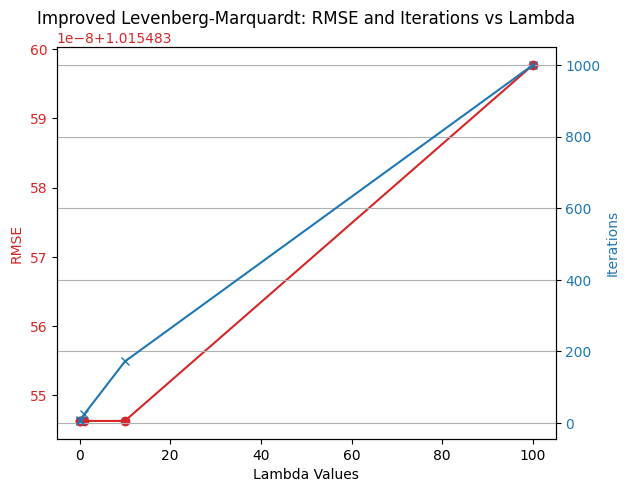

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def levenberg_marquardt_improved(X, Y, max_iterations=1000, tolerance=1e-6, lambda_val=0.1):
    beta = np.zeros(X.shape[1])
    for i in range(max_iterations):
        Y_pred = X.dot(beta)
        error = Y_pred - Y
        gradient = np.mean(X * error[:, np.newaxis], axis=0)
        hessian = np.mean(X**2, axis=0)
        if np.abs(gradient).max() < tolerance:
            break
        beta = beta - np.linalg.inv(np.diag(hessian) + lambda_val * np.eye(X.shape[1])) @ gradient
    return beta, i + 1  # return beta and number of iterations

def collect_and_plot_lambda_improved(X, Y, lambda_values):
    rmse = []
    iterations = []

    for lambda_val in lambda_values:
        beta_lm, iter_count = levenberg_marquardt_improved(X, Y, lambda_val=lambda_val)
        Y_pred = X.dot(beta_lm)
        rmse_val = np.sqrt(np.mean((Y_pred - Y)**2))
        rmse.append(rmse_val)
        iterations.append(iter_count)

    # Print results
    print(f"Lambda Values: {lambda_values}")
    print(f"RMSE: {rmse}")
    print(f"Iterations: {iterations}")

    # Plotting RMSE and Iterations
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Lambda Values')
    ax1.set_ylabel('RMSE', color=color)
    ax1.plot(lambda_values, rmse, marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Iterations', color=color)
    ax2.plot(lambda_values, iterations, marker='x', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Improved Levenberg-Marquardt: RMSE and Iterations vs Lambda')
    plt.grid(True)
    plt.show()

# Example usage with simulated data
np.random.seed(0)
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)
true_beta = np.array([2.5, -1.0, 0.5])
Y = X.dot(true_beta) + np.random.normal(0, 1, n_samples)

# Lambda values to test
lambda_values = [0.01, 0.1, 1, 10, 100]

# Collect and plot results for improved Levenberg-Marquardt
collect_and_plot_lambda_improved(X, Y, lambda_values)



Convergence Criterion: 0.0001
Sample Size	Bias
10		0.1282
20		0.0293
30		-0.0648
40		-0.0526
50		-0.0319
60		-0.0302
70		-0.0009
80		-0.0294
90		-0.0261
100		-0.0236

Convergence Criterion: 1e-05
Sample Size	Bias
10		-0.0636
20		-0.1198
30		-0.0377
40		-0.0078
50		-0.0491
60		-0.0022
70		-0.0286
80		0.0039
90		-0.0239
100		-0.0236

Convergence Criterion: 1e-06
Sample Size	Bias
10		-0.0094
20		0.0236
30		-0.0410
40		-0.0392
50		-0.0520
60		-0.0489
70		-0.0369
80		-0.0109
90		-0.0151
100		-0.0236

Convergence Criterion: 1e-07
Sample Size	Bias
10		-0.0717
20		0.0001
30		-0.0521
40		-0.0704
50		-0.0720
60		-0.0210
70		-0.0339
80		-0.0341
90		-0.0123
100		-0.0236


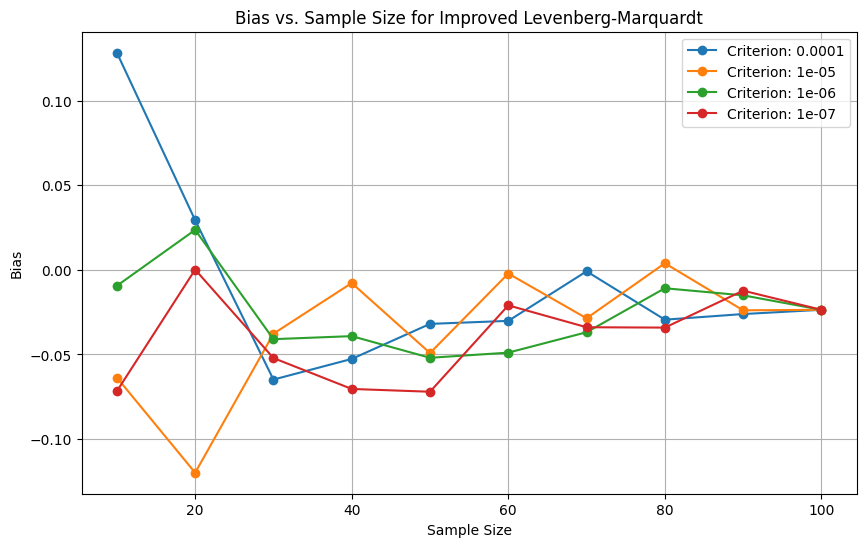

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with different population characteristics
def simulate_data(x, true_params, noise_std):
    return true_params[0] * np.sin(true_params[1] * x) + true_params[2] + np.random.normal(0, noise_std, len(x))

# Function to calculate bias
def calculate_bias(beta_estimated, beta_true):
    return np.mean(beta_estimated - beta_true)

# Function to generate different sample sizes
def generate_sample_sizes(x, y, sizes):
    sample_data = []
    for size in sizes:
        indices = np.random.choice(len(x), size, replace=False)
        sample_data.append((x[indices], y[indices]))
    return sample_data

# Parameters for simulation
np.random.seed(42)
true_params = np.array([1.5, -2.0, 1.0])
x_data = np.linspace(0, 10, 100)
noise_std = 0.5

# Improved Initial Parameter Guess
initial_params_lm = np.array([1.5, -2.0, 1.0])

# Convergence criteria to test
convergence_criteria = [1e-4, 1e-5, 1e-6, 1e-7]

# Sample sizes to test
sample_sizes = np.arange(10, 101, 10)

# Placeholder for results
results = []

# Evaluate the algorithm for each convergence criterion
for criterion in convergence_criteria:
    biases = []
    for size in sample_sizes:
        sample_data = generate_sample_sizes(x_data, y_data_base, [size])[0]

        params_lm = initial_params_lm.copy()
        while True:
            y_pred_lm = params_lm[0] * np.sin(params_lm[1] * sample_data[0]) + params_lm[2]
            error_lm = sample_data[1] - y_pred_lm
            J_lm = np.vstack((
                np.sin(params_lm[1] * sample_data[0]),
                params_lm[0] * sample_data[0] * np.cos(params_lm[1] * sample_data[0]),
                np.ones_like(sample_data[0])
            )).T
            H_lm = J_lm.T @ J_lm
            params_lm_new = params_lm + np.linalg.inv(H_lm + criterion * np.eye(3)) @ J_lm.T @ error_lm
            if np.allclose(params_lm, params_lm_new, rtol=1e-6):
                break
            params_lm = params_lm_new

        bias_value = calculate_bias(params_lm, true_params)
        biases.append(bias_value)

    results.append({
        'criterion': criterion,
        'sample_sizes': sample_sizes,
        'biases': biases
    })

# Print the results
for result in results:
    print(f"\nConvergence Criterion: {result['criterion']}")
    print("Sample Size\tBias")
    for size, bias_value in zip(result['sample_sizes'], result['biases']):
        print(f"{size}\t\t{bias_value:.4f}")

# Plot Bias vs. sample size for each criterion
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['sample_sizes'], result['biases'], marker='o', label=f"Criterion: {result['criterion']}")
plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.title('Bias vs. Sample Size for Improved Levenberg-Marquardt')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from google.colab import drive

In [52]:
import pandas as pd

In [96]:
data = pd.read_csv("/content/contentdrive/MyDrive/acs2017_county_data.csv")

In [97]:
# Display the first few rows of the dataframe
data.head(50)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
5,1011,Alabama,Bullock County,10478,5616,4862,0.3,21.6,75.6,1.0,...,6.2,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1
6,1013,Alabama,Butler County,20126,9416,10710,0.3,52.2,44.7,0.1,...,0.9,0.9,2.0,23.2,7727,79.1,15.3,5.3,0.3,7.6
7,1015,Alabama,Calhoun County,115527,55593,59934,3.6,72.7,20.4,0.2,...,1.3,1.1,3.2,24.8,47392,74.9,19.9,5.1,0.1,10.1
8,1017,Alabama,Chambers County,33895,16320,17575,2.2,56.2,39.3,0.3,...,0.6,0.5,2.0,23.6,14527,84.5,11.8,3.7,0.0,6.4
9,1019,Alabama,Cherokee County,25855,12862,12993,1.6,91.8,5.0,0.5,...,0.3,0.3,2.0,26.5,9879,74.8,17.1,8.1,0.0,5.3
